Processing sheet: Arsenic


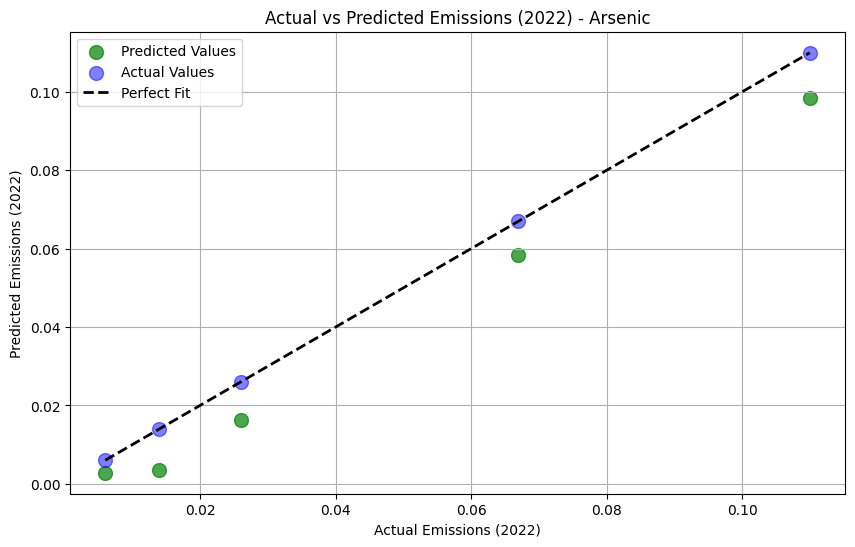

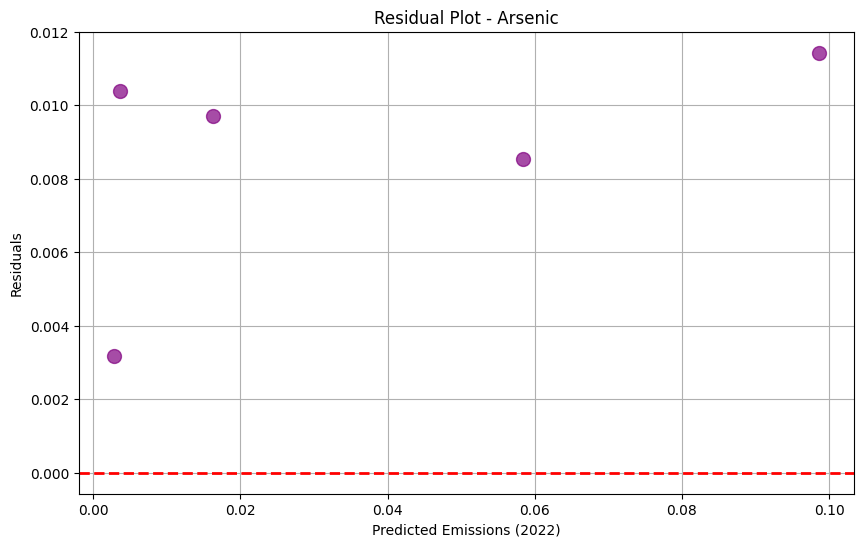

Processing sheet: Cadmium


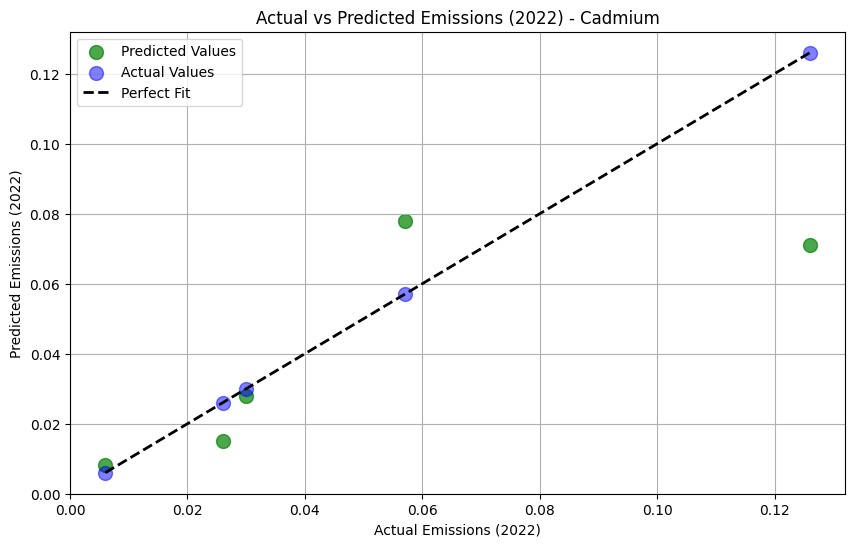

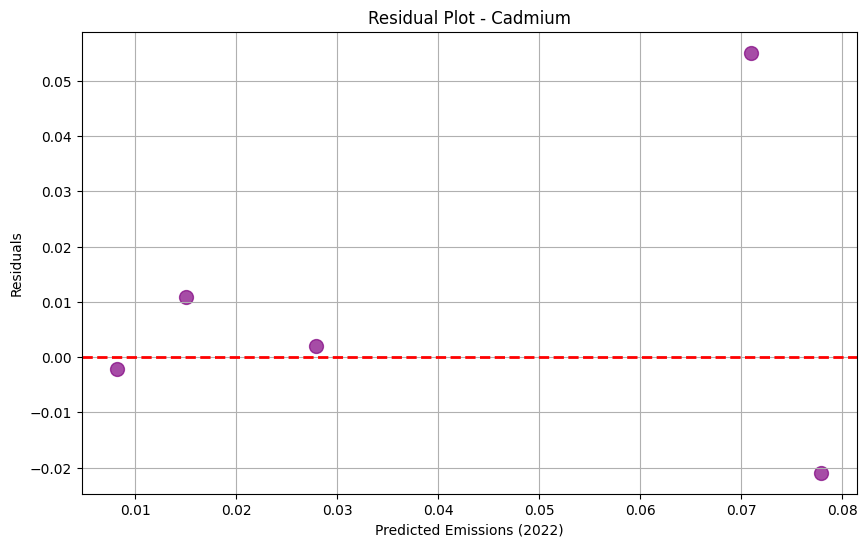

Processing sheet: Chromium


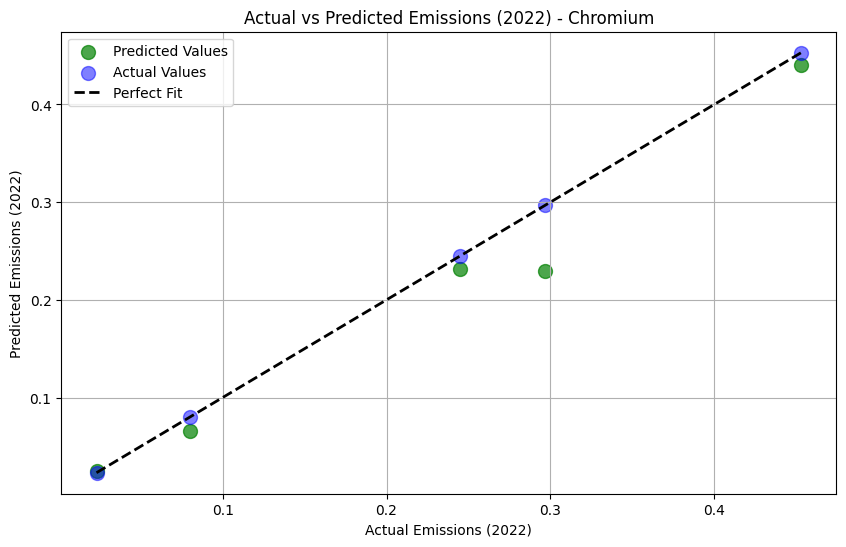

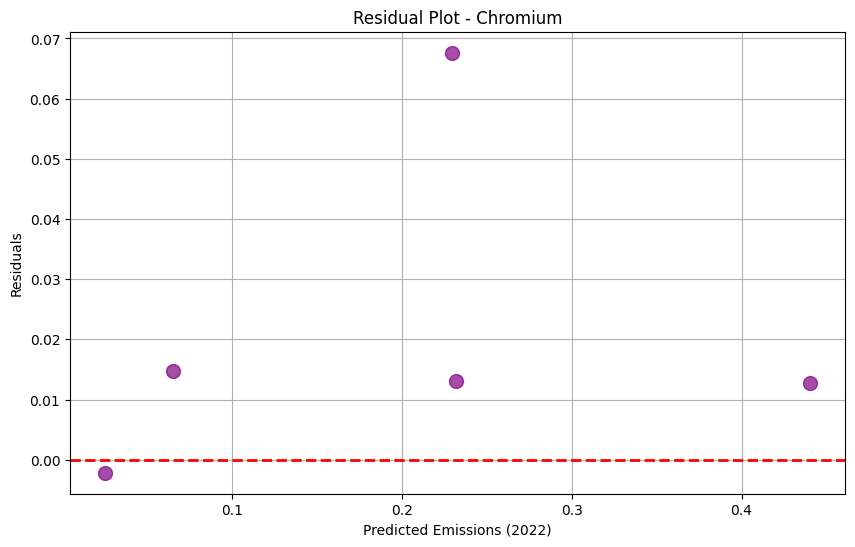

Processing sheet: Copper


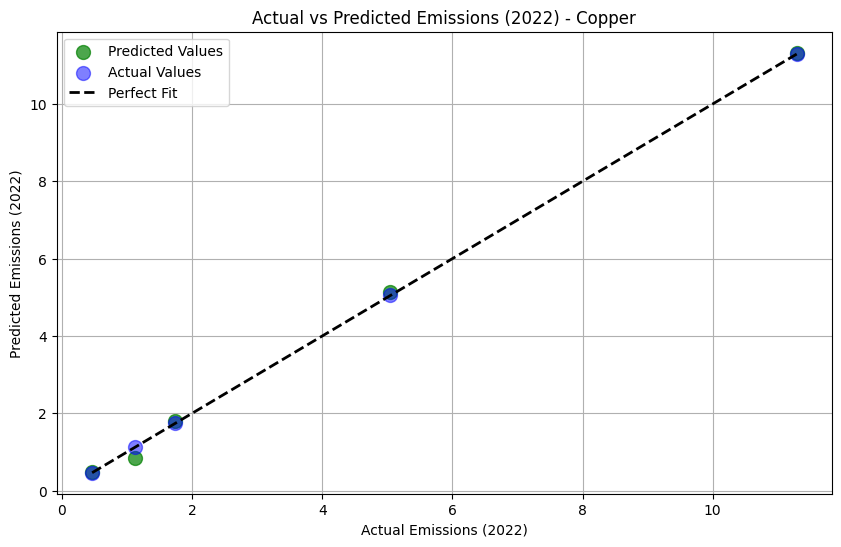

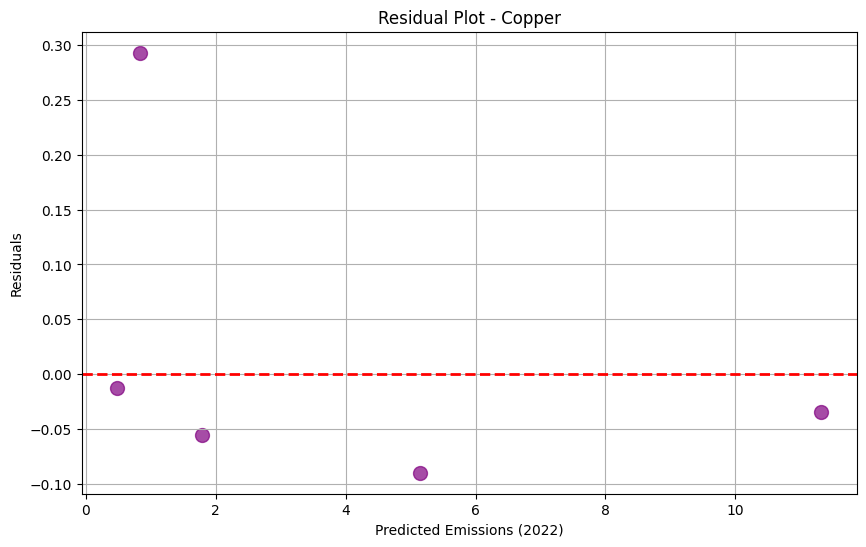

Processing sheet: Lead


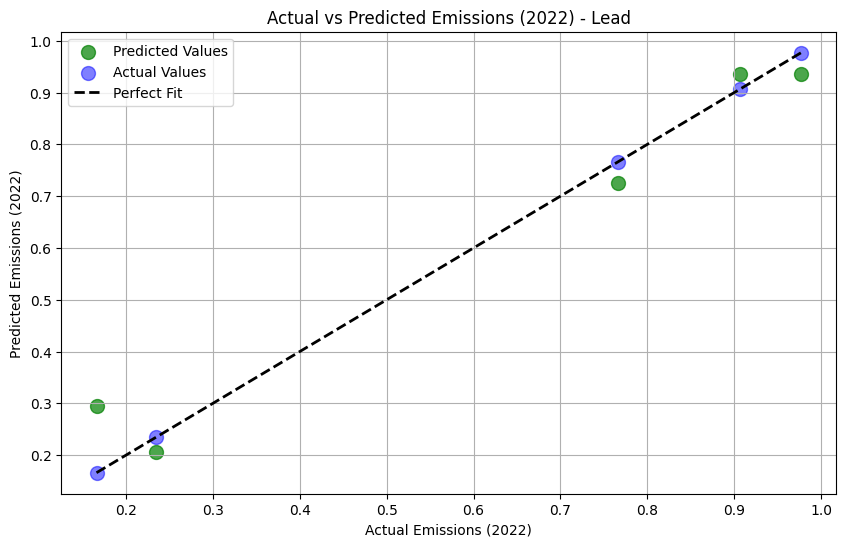

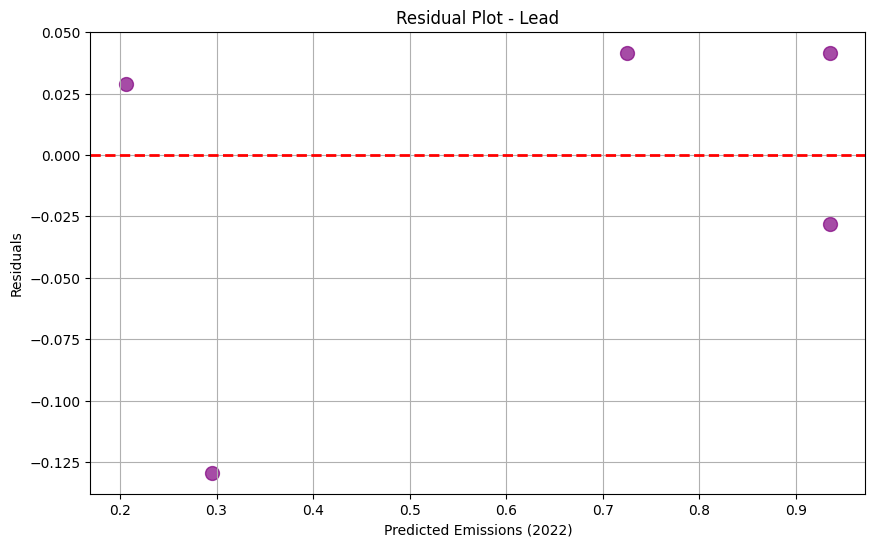

Processing sheet: Mercury


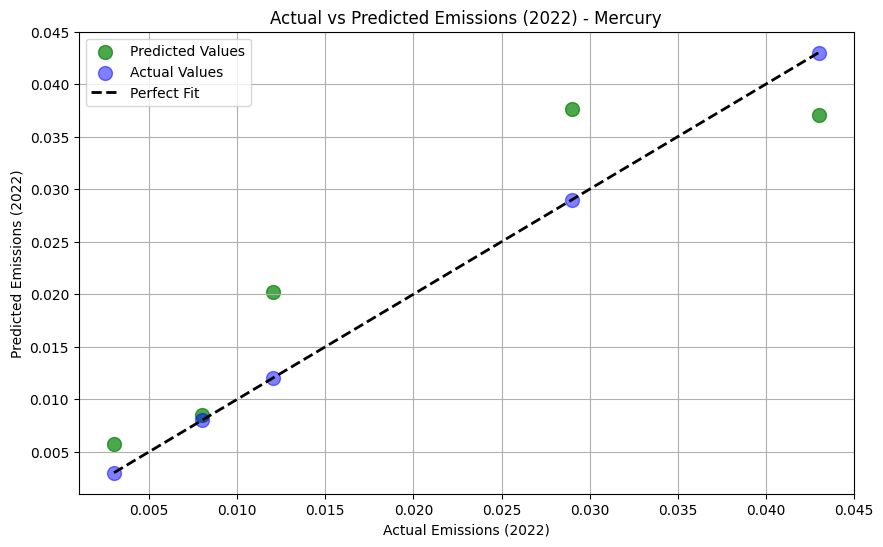

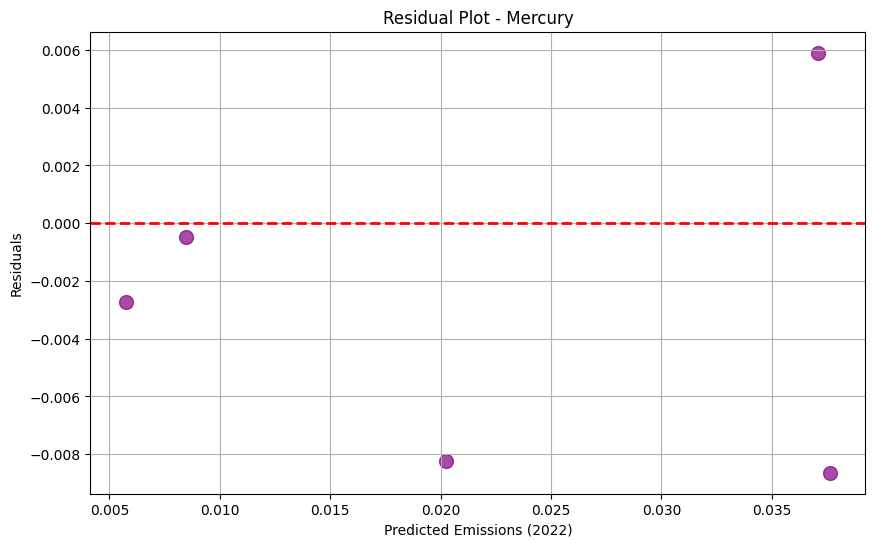

Processing sheet: Nickel


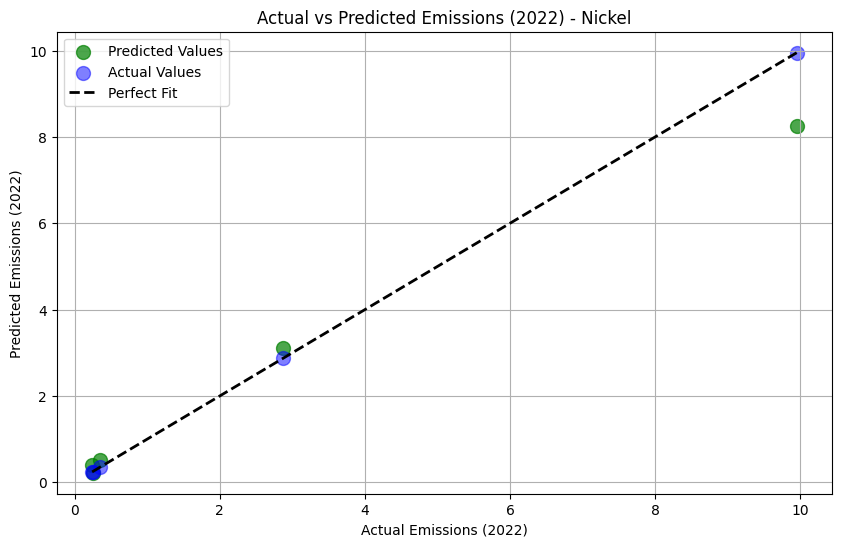

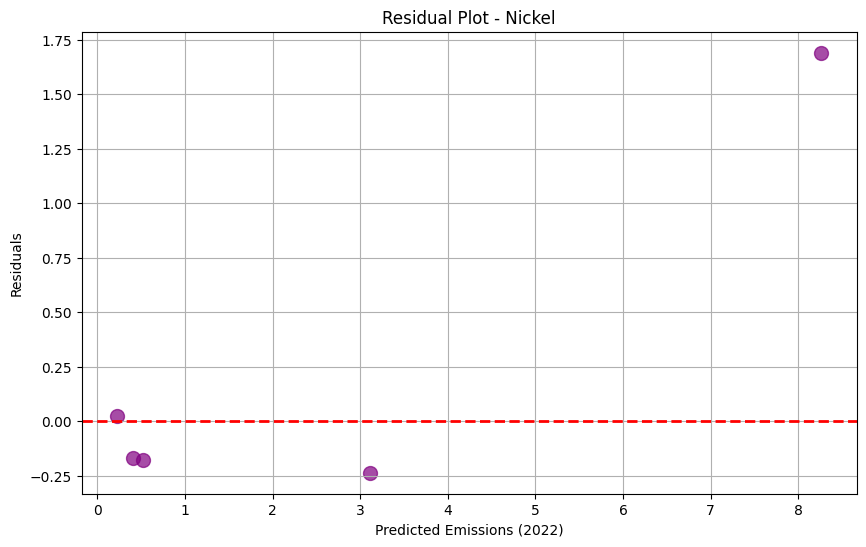

Processing sheet: Selenium


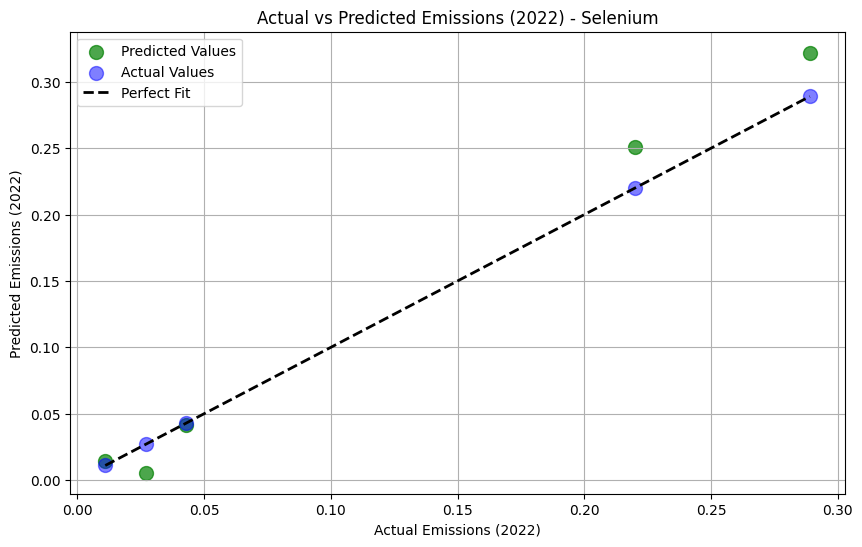

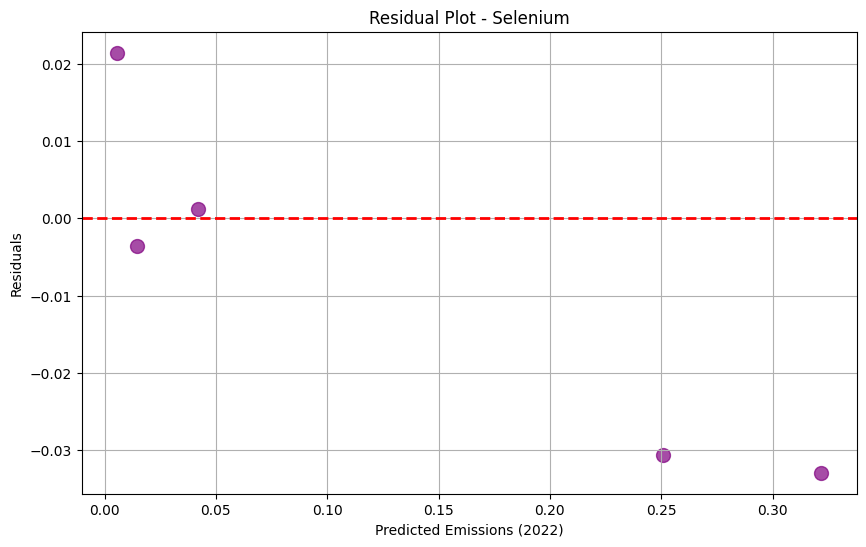

Processing sheet: Vanadium


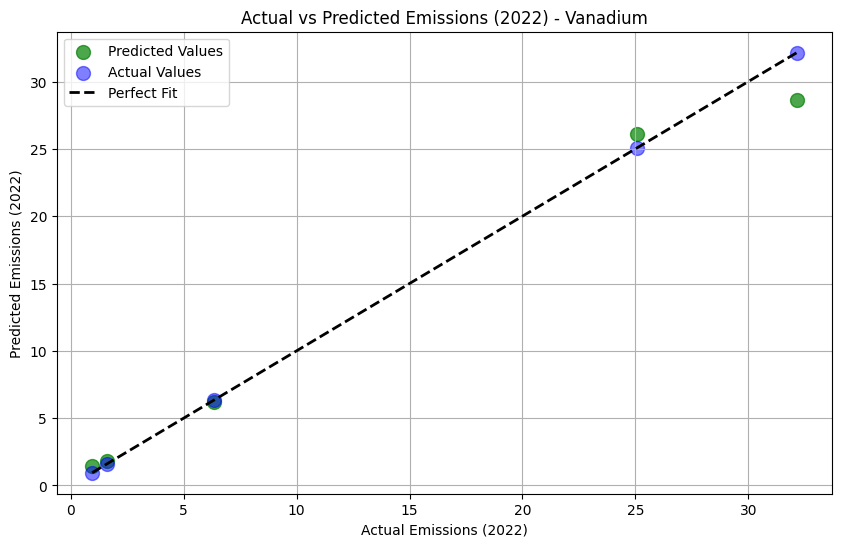

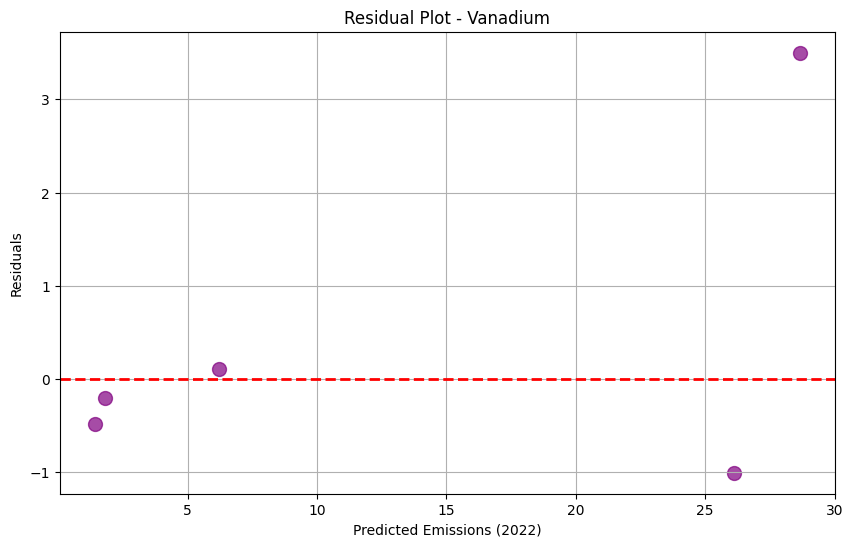

Processing sheet: Zinc


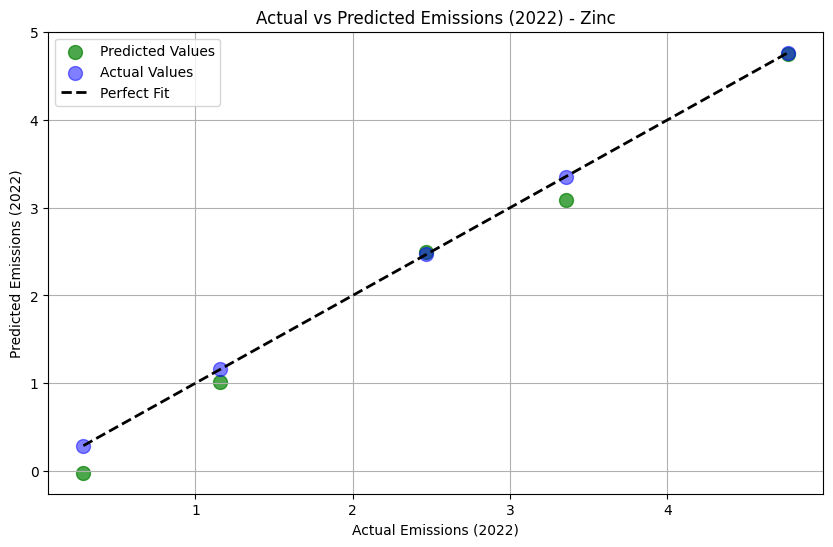

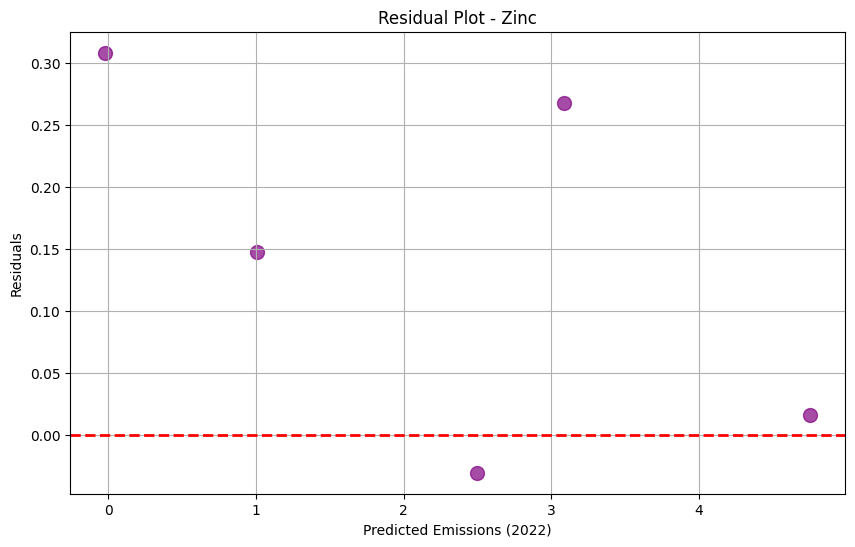

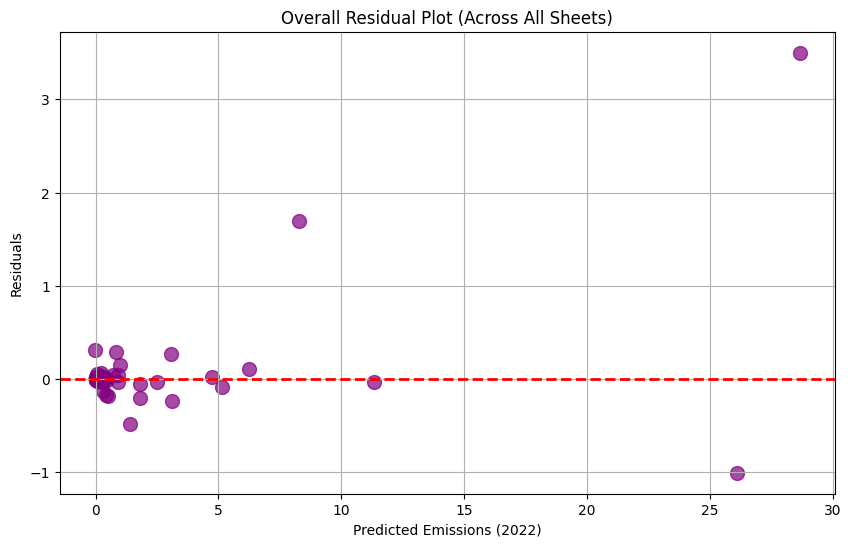

ValueError: x and y must have same first dimension, but have shapes (40,) and (8,)

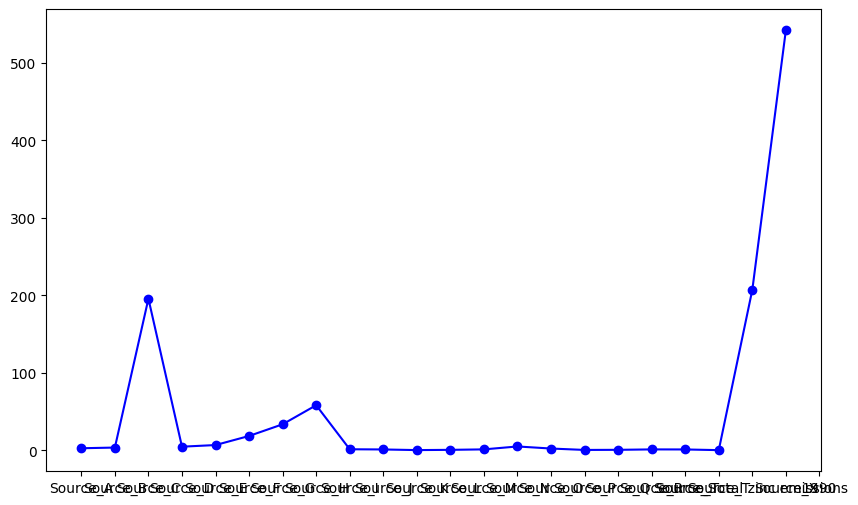

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'AirborneEmissions_Processed.xlsx'

# Get the names of all sheets in the Excel file
sheet_names = pd.ExcelFile(file_path).sheet_names

# Define future years for predictions
future_years = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']

# Initialize lists to hold all predictions and actual values
all_y_true = []
all_y_pred = []

# Iterate through each sheet in the Excel file
for sheet_name in sheet_names:
    print(f"Processing sheet: {sheet_name}")

    # Read the data from the current sheet
    data = pd.read_excel(file_path, sheet_name=sheet_name)

    # Extract the 'Sources' column (categorical variable)
    sources = data['Sources']

    # One-hot encode the 'Sources' column
    encoder = OneHotEncoder(sparse_output=False)
    sources_encoded = encoder.fit_transform(sources.values.reshape(-1, 1))

    # Convert encoded sources to DataFrame and concatenate with the original data
    sources_encoded_df = pd.DataFrame(sources_encoded, columns=encoder.get_feature_names_out(['Source']))
    data_encoded = pd.concat([sources_encoded_df, data.drop(columns=['Sources'])], axis=1)

    # Check for missing values
    if data_encoded.isnull().any().any():
        print("Missing values found. Skipping this sheet.")
        continue  # Skip this sheet if there are missing values

    # Convert all column names to strings to ensure compatibility with scikit-learn
    data_encoded.columns = data_encoded.columns.astype(str)

    # Define features (X) as all years from 1990 to 2021 (excluding the target year 2022)
    X = data_encoded.drop(columns=['2022'])  # We keep all the past years as features except for 2022

    # Define the target variable (y) as the emission values for the year 2022
    y = data_encoded['2022']

    # Split the data into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the emissions for the test set
    y_pred = model.predict(X_test)

    # Store the predictions and actual values
    all_y_true.extend(y_test.tolist())
    all_y_pred.extend(y_pred.tolist())

    ### Actual vs Predicted plot (Updated with custom colors)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', label='Predicted Values', s=100, alpha=0.7)  # Green color for predicted
    plt.scatter(y_test, y_test, color='blue', label='Actual Values', s=100, alpha=0.5)  # Blue color for actual
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Emissions (2022)')
    plt.ylabel('Predicted Emissions (2022)')
    plt.title(f'Actual vs Predicted Emissions (2022) - {sheet_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    ### Residual Plot
    residuals = y_test - y_pred  # Calculate residuals

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='purple', s=100, alpha=0.7)  # Purple color for residuals
    plt.axhline(y=0, color='red', linestyle='--', lw=2)  # Horizontal line at residual=0
    plt.xlabel('Predicted Emissions (2022)')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {sheet_name}')
    plt.grid(True)
    plt.show()

# Overall Residuals (Combined across all sheets)
if all_y_true and all_y_pred:
    overall_residuals = np.array(all_y_true) - np.array(all_y_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(all_y_pred, overall_residuals, color='purple', s=100, alpha=0.7)  # Purple color for residuals
    plt.axhline(y=0, color='red', linestyle='--', lw=2)  # Horizontal line at residual=0
    plt.xlabel('Predicted Emissions (2022)')
    plt.ylabel('Residuals')
    plt.title('Overall Residual Plot (Across All Sheets)')
    plt.grid(True)
    plt.show()

# Future Predictions (for last processed sheet)
if all_y_true and all_y_pred:
    future_predictions = pd.DataFrame(columns=future_years)

    # Predict future emissions using the last model trained on the last sheet's data
    for year in future_years:
        future_predictions[year] = model.predict(X)  # Use the same feature set to predict future emissions

    # Visualize future predictions
    years = list(X.columns) + future_years
    past_emissions = y.tolist()  # Actual emissions up to 2022
    predicted_future_emissions = future_predictions.iloc[0].tolist()  # Future predictions for first sample

    plt.figure(figsize=(10, 6))
    plt.plot(years[:len(past_emissions)], past_emissions, 'o-', label="Actual Emissions (1990-2022)", color='blue')
    plt.plot(years[len(past_emissions):], predicted_future_emissions, 'o--', label="Predicted Future Emissions (2023-2030)", color='red')
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.title("Actual vs Predicted Future Emissions")
    plt.legend()
    plt.grid(True)
    plt.show()


# SVM

Processing sheet: Arsenic


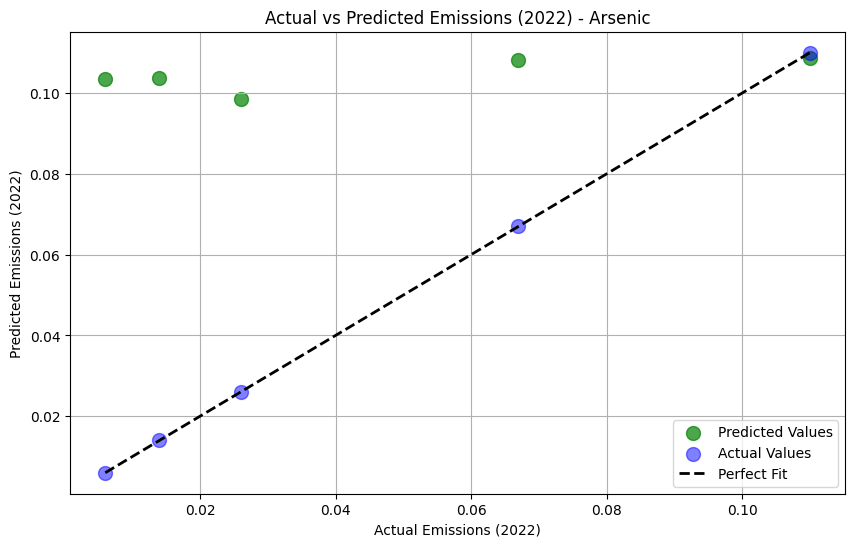

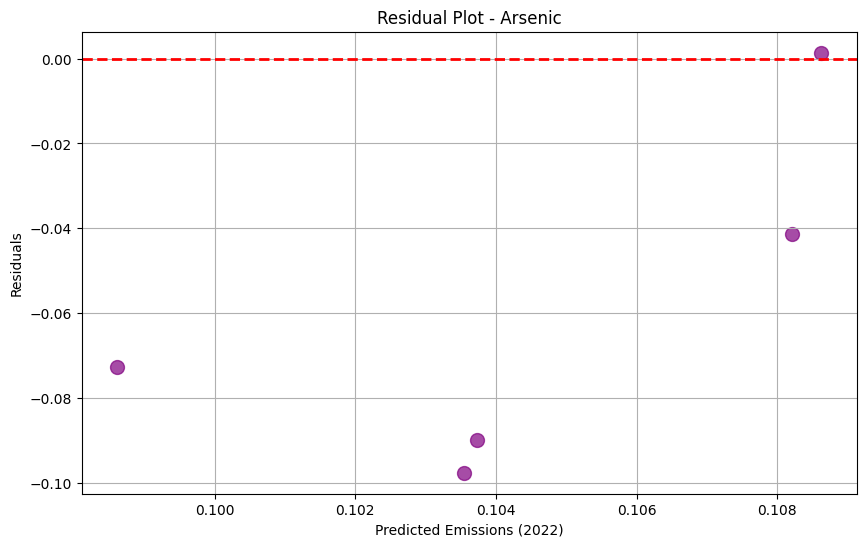

Processing sheet: Cadmium


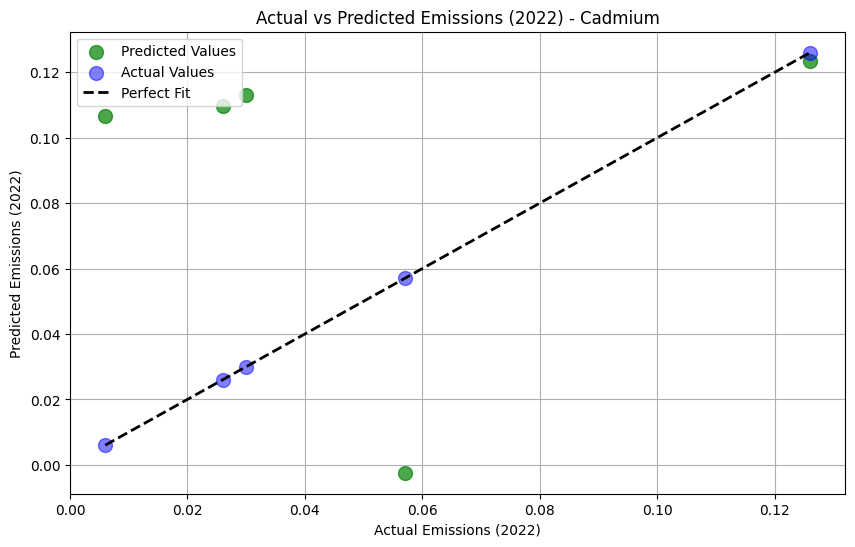

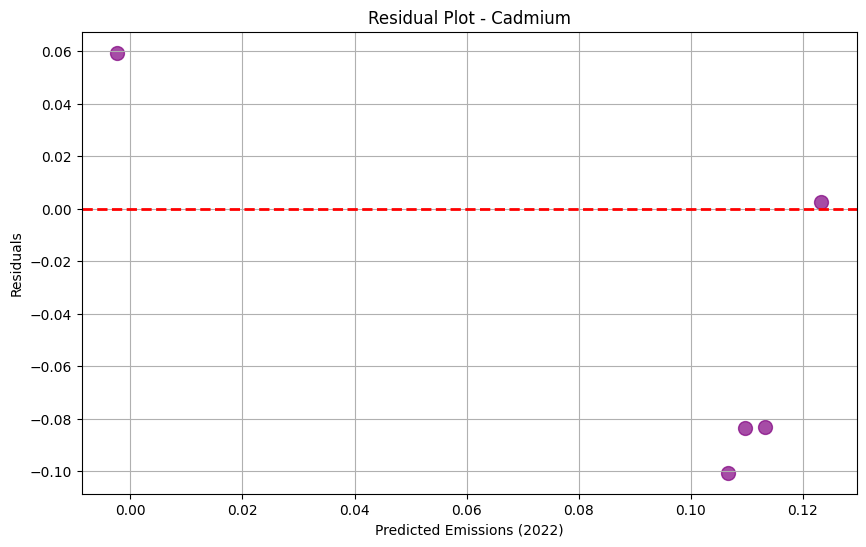

Processing sheet: Chromium


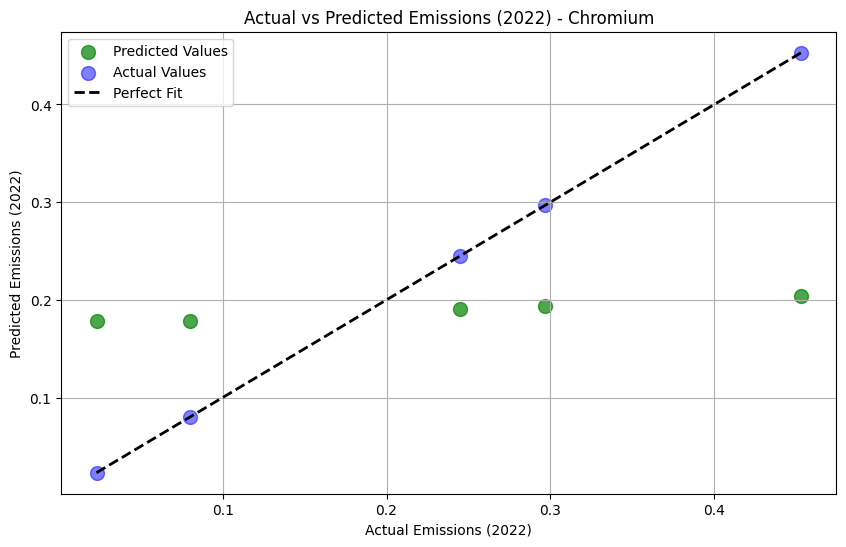

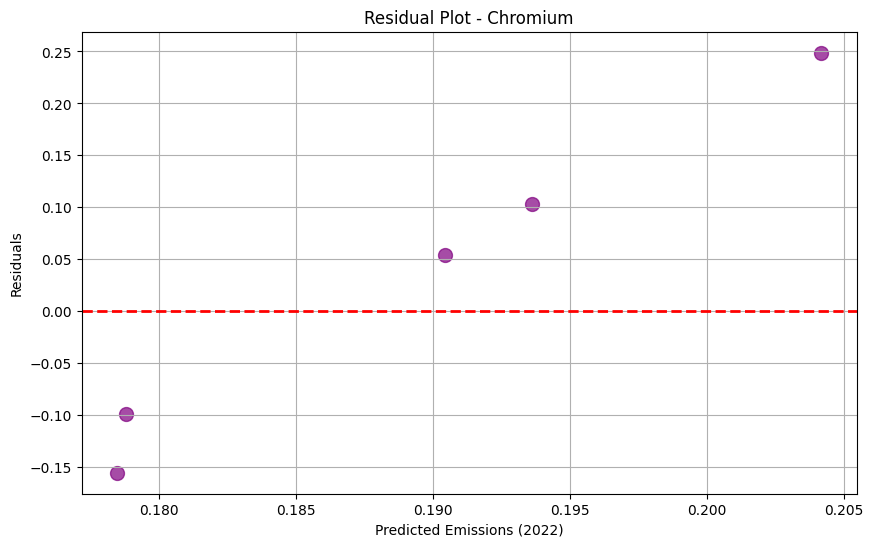

Processing sheet: Copper


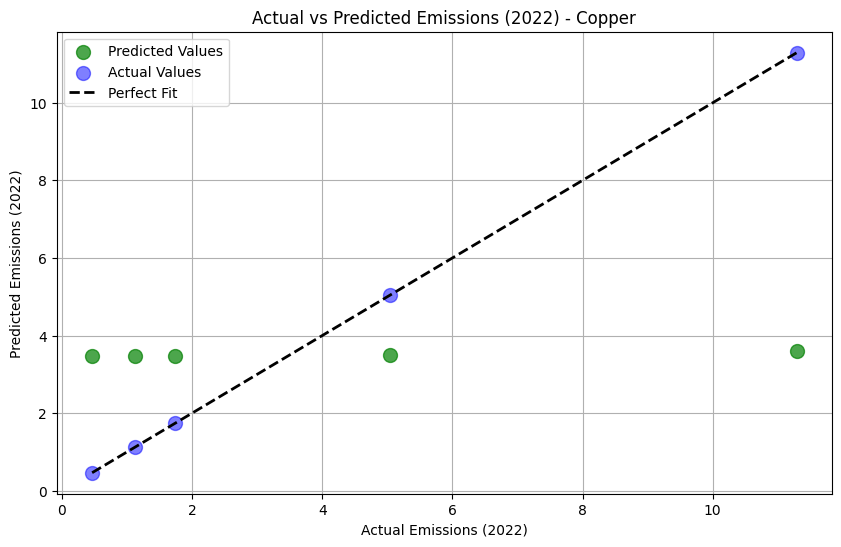

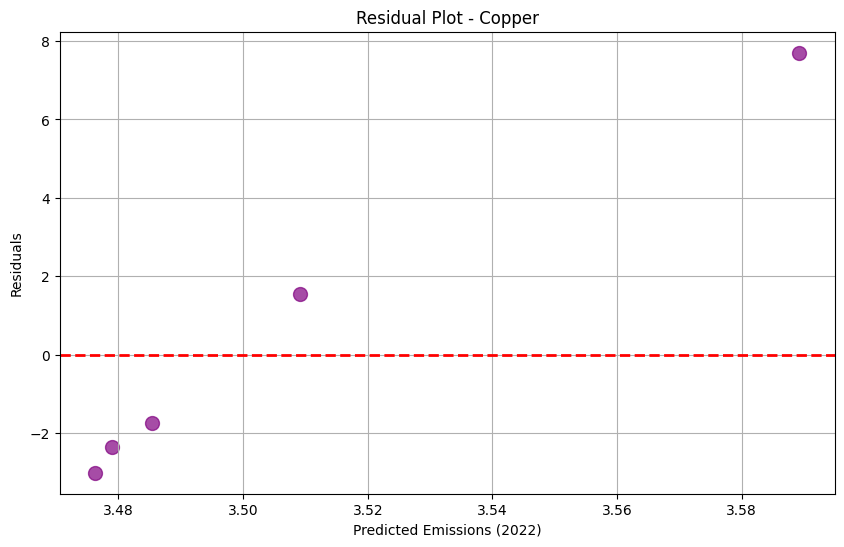

Processing sheet: Lead


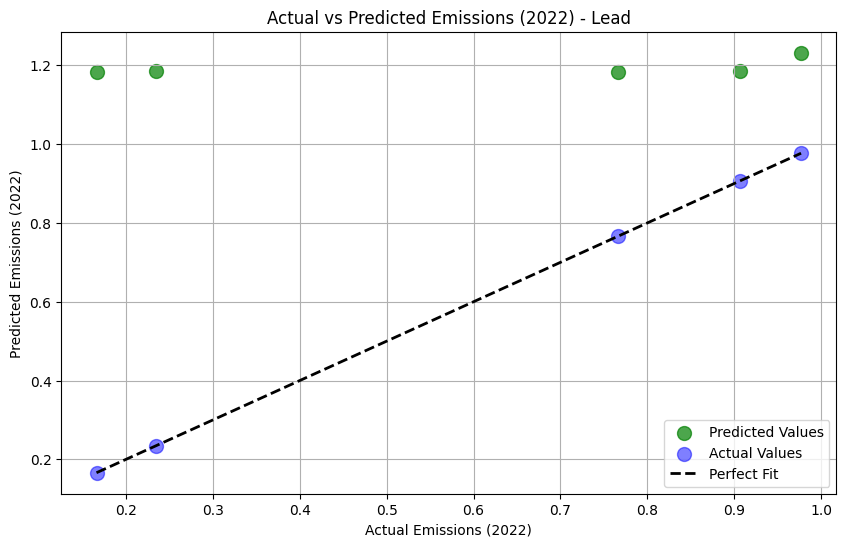

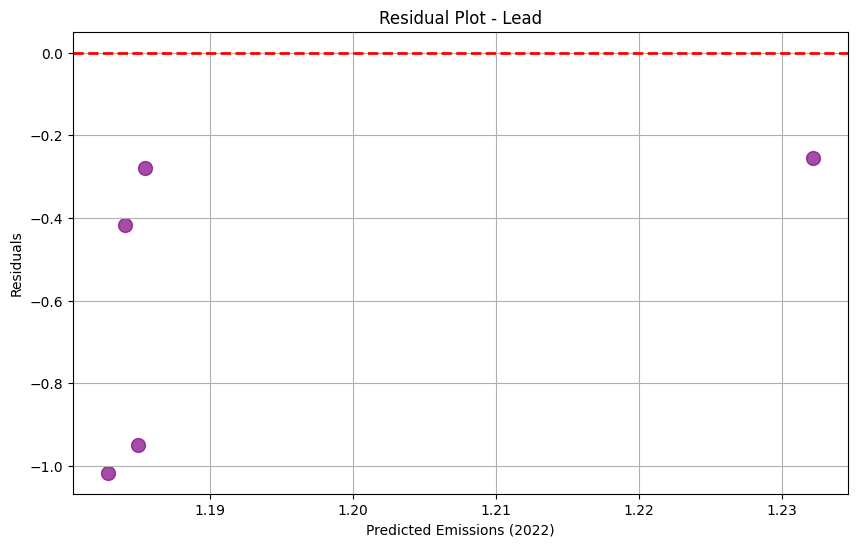

Processing sheet: Mercury


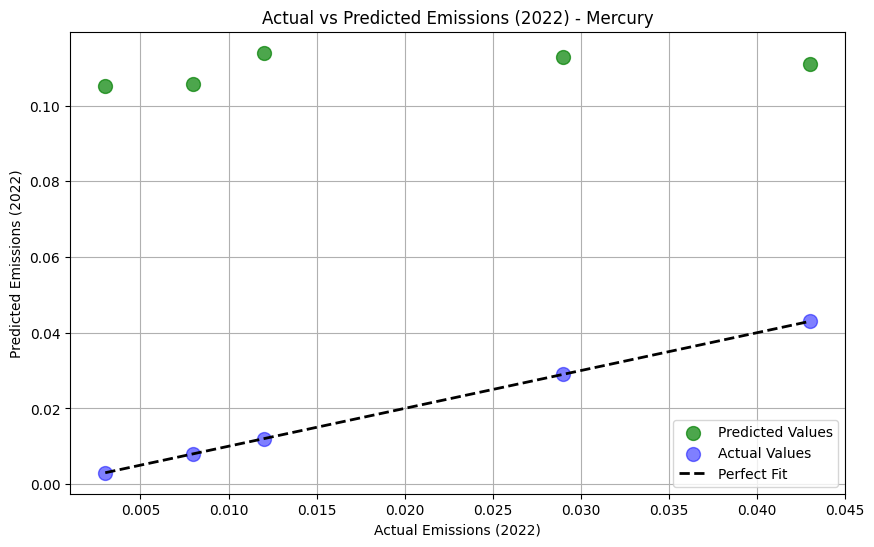

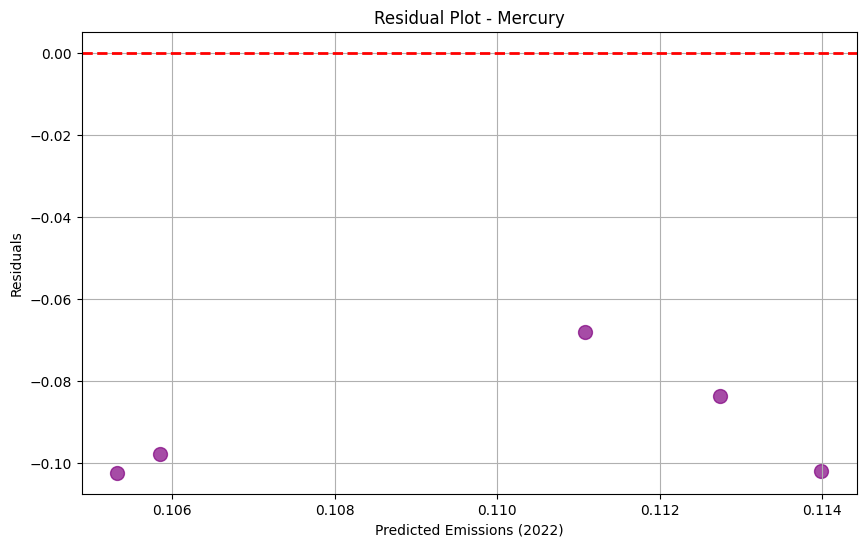

Processing sheet: Nickel


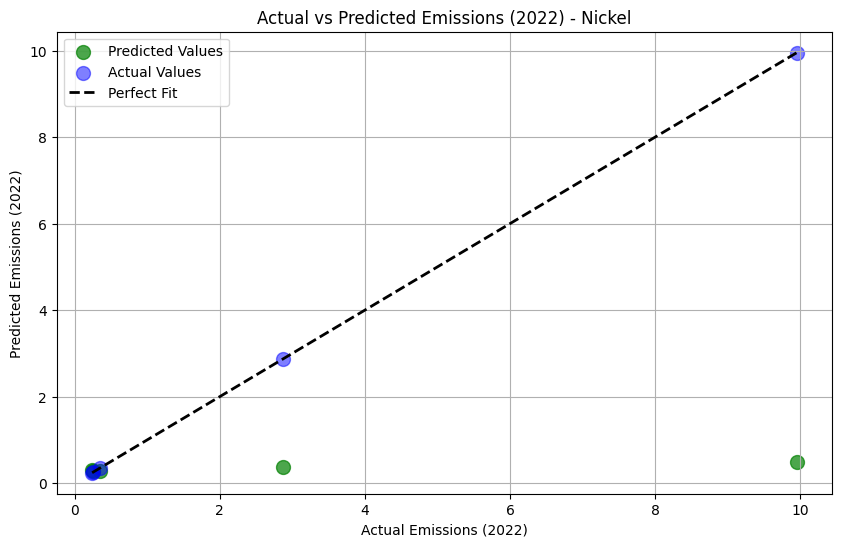

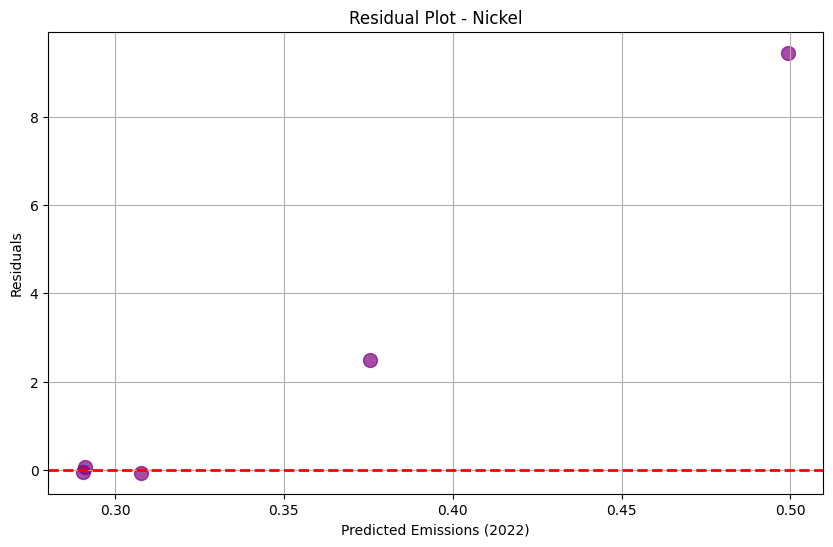

Processing sheet: Selenium


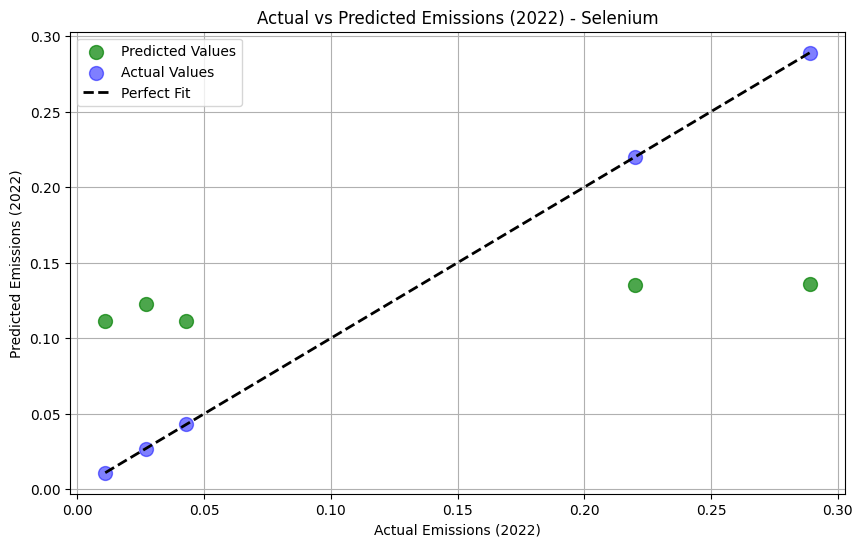

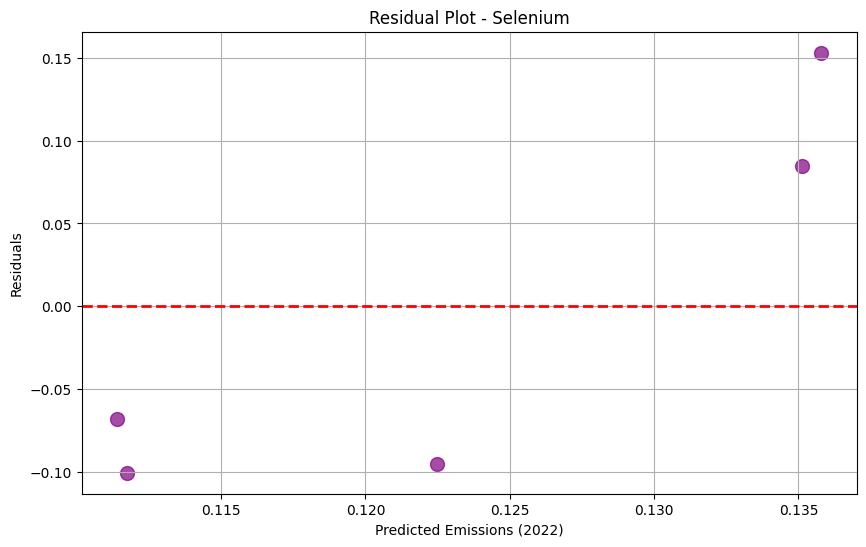

Processing sheet: Vanadium


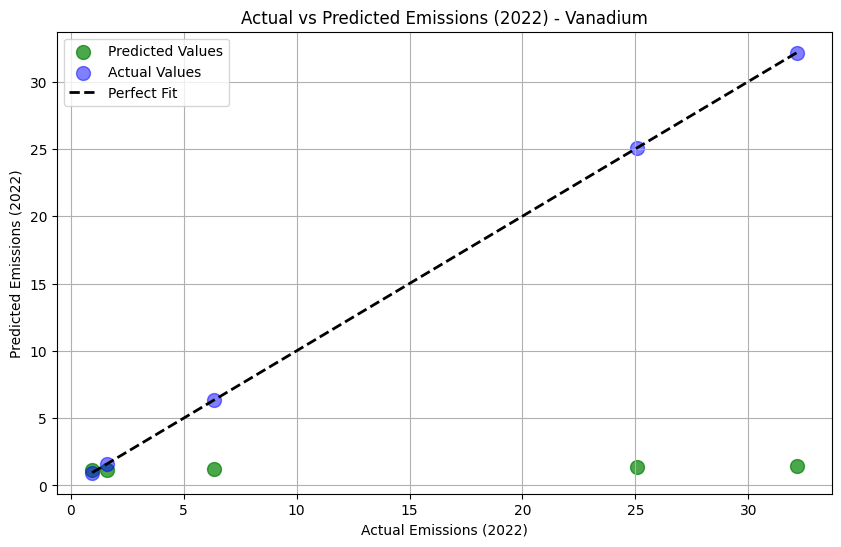

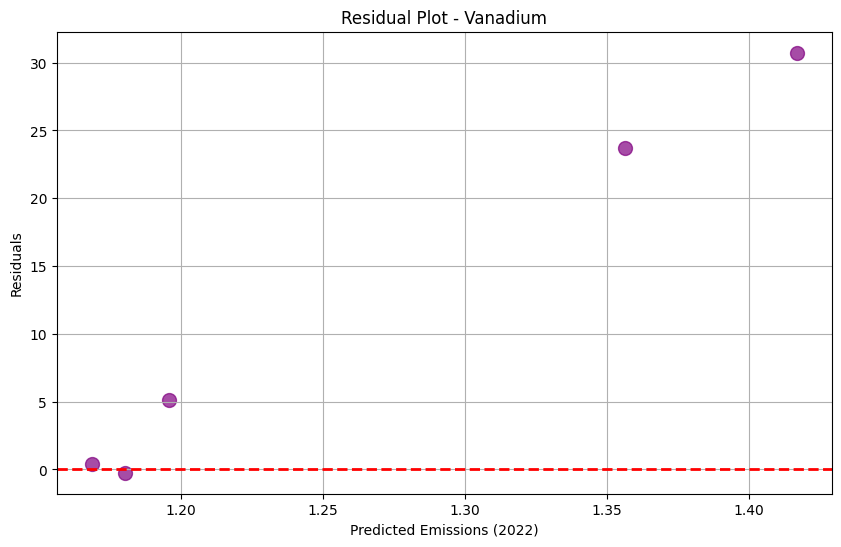

Processing sheet: Zinc


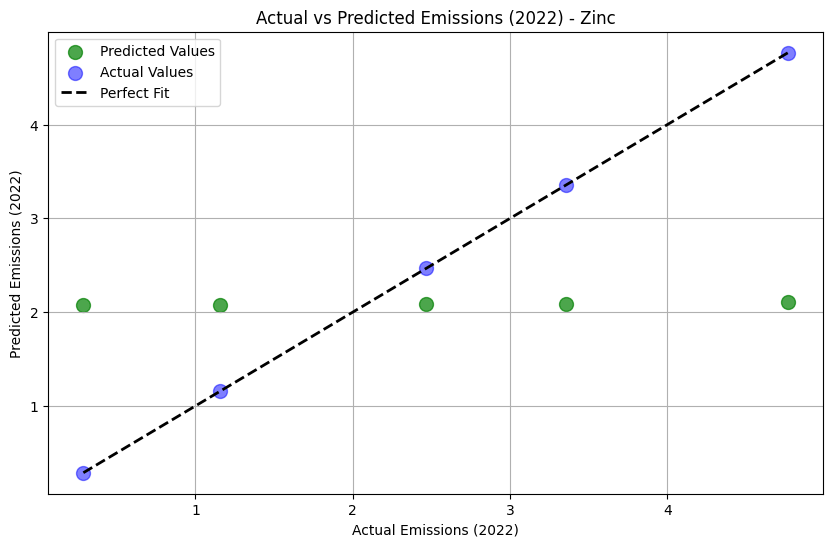

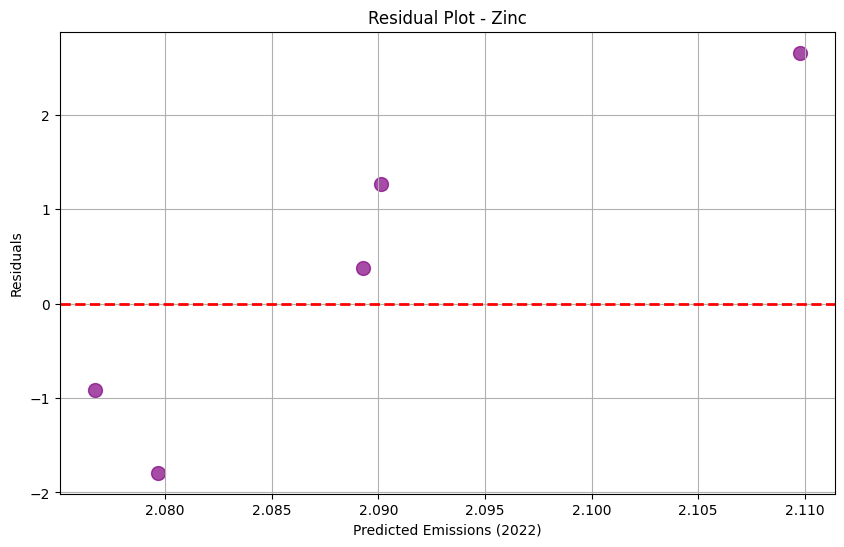

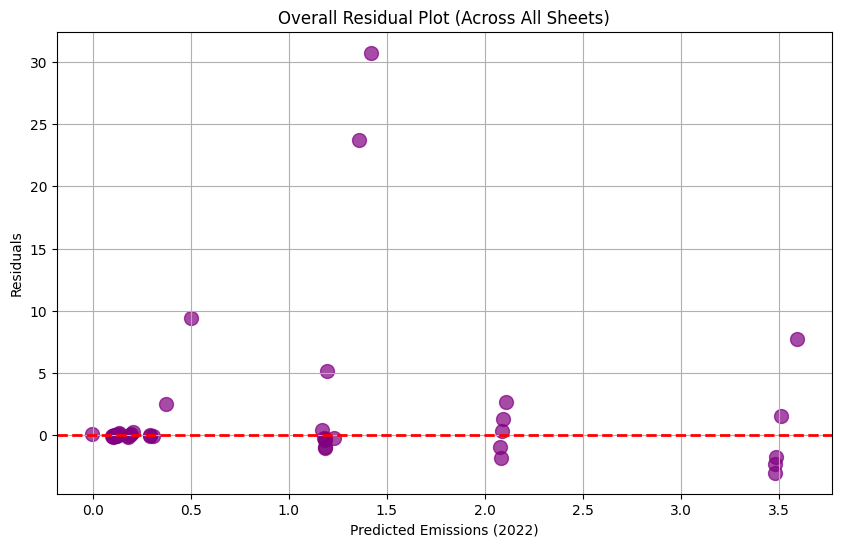

ValueError: x and y must have same first dimension, but have shapes (40,) and (8,)

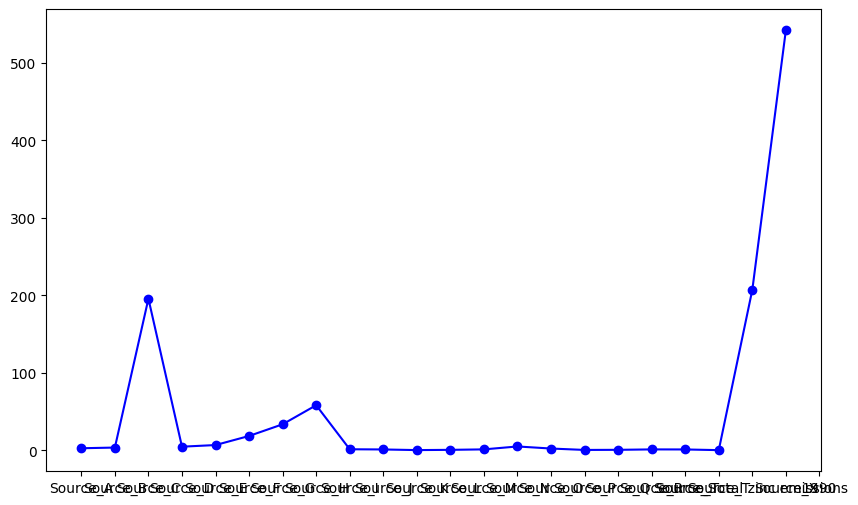

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'AirborneEmissions_Processed.xlsx'

# Get the names of all sheets in the Excel file
sheet_names = pd.ExcelFile(file_path).sheet_names

# Define future years for predictions
future_years = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']

# Initialize lists to hold all predictions and actual values
all_y_true = []
all_y_pred = []

# Iterate through each sheet in the Excel file
for sheet_name in sheet_names:
    print(f"Processing sheet: {sheet_name}")

    # Read the data from the current sheet
    data = pd.read_excel(file_path, sheet_name=sheet_name)

    # Extract the 'Sources' column (categorical variable)
    sources = data['Sources']

    # One-hot encode the 'Sources' column
    encoder = OneHotEncoder(sparse_output=False)
    sources_encoded = encoder.fit_transform(sources.values.reshape(-1, 1))

    # Convert encoded sources to DataFrame and concatenate with the original data
    sources_encoded_df = pd.DataFrame(sources_encoded, columns=encoder.get_feature_names_out(['Source']))
    data_encoded = pd.concat([sources_encoded_df, data.drop(columns=['Sources'])], axis=1)

    # Check for missing values
    if data_encoded.isnull().any().any():
        print("Missing values found. Skipping this sheet.")
        continue  # Skip this sheet if there are missing values

    # Convert all column names to strings to ensure compatibility with scikit-learn
    data_encoded.columns = data_encoded.columns.astype(str)

    # Define features (X) as all years from 1990 to 2021 (excluding the target year 2022)
    X = data_encoded.drop(columns=['2022'])  # We keep all the past years as features except for 2022

    # Define the target variable (y) as the emission values for the year 2022
    y = data_encoded['2022']

    # Split the data into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Support Vector Regression model
    model = SVR(kernel='rbf')  # You can change the kernel as needed (e.g., 'linear', 'poly')
    model.fit(X_train, y_train)

    # Predict the emissions for the test set
    y_pred = model.predict(X_test)

    # Store the predictions and actual values
    all_y_true.extend(y_test.tolist())
    all_y_pred.extend(y_pred.tolist())

    ### Actual vs Predicted plot (Updated with custom colors)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', label='Predicted Values', s=100, alpha=0.7)  # Green for predicted
    plt.scatter(y_test, y_test, color='blue', label='Actual Values', s=100, alpha=0.5)  # Blue for actual
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Emissions (2022)')
    plt.ylabel('Predicted Emissions (2022)')
    plt.title(f'Actual vs Predicted Emissions (2022) - {sheet_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    ### Residual Plot
    residuals = y_test - y_pred  # Calculate residuals

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='purple', s=100, alpha=0.7)  # Purple for residuals
    plt.axhline(y=0, color='red', linestyle='--', lw=2)  # Horizontal line at residual=0
    plt.xlabel('Predicted Emissions (2022)')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {sheet_name}')
    plt.grid(True)
    plt.show()

# Overall Residuals (Combined across all sheets)
if all_y_true and all_y_pred:
    overall_residuals = np.array(all_y_true) - np.array(all_y_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(all_y_pred, overall_residuals, color='purple', s=100, alpha=0.7)  # Purple for residuals
    plt.axhline(y=0, color='red', linestyle='--', lw=2)  # Horizontal line at residual=0
    plt.xlabel('Predicted Emissions (2022)')
    plt.ylabel('Residuals')
    plt.title('Overall Residual Plot (Across All Sheets)')
    plt.grid(True)
    plt.show()

# Future Predictions (for last processed sheet)
if all_y_true and all_y_pred:
    future_predictions = pd.DataFrame(columns=future_years)

    # Predict future emissions using the last model trained on the last sheet's data
    for year in future_years:
        future_predictions[year] = model.predict(X)  # Use the same feature set to predict future emissions

    # Visualize future predictions
    years = list(X.columns) + future_years
    past_emissions = y.tolist()  # Actual emissions up to 2022
    predicted_future_emissions = future_predictions.iloc[0].tolist()  # Future predictions for first sample

    plt.figure(figsize=(10, 6))
    plt.plot(years[:len(past_emissions)], past_emissions, 'o-', label="Actual Emissions (1990-2022)", color='blue')
    plt.plot(years[len(past_emissions):], predicted_future_emissions, 'o--', label="Predicted Future Emissions (2023-2030)", color='red')
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.title("Actual vs Predicted Future Emissions")
    plt.legend()
    plt.grid(True)
    plt.show()

# Random Forest

Processing sheet: Arsenic


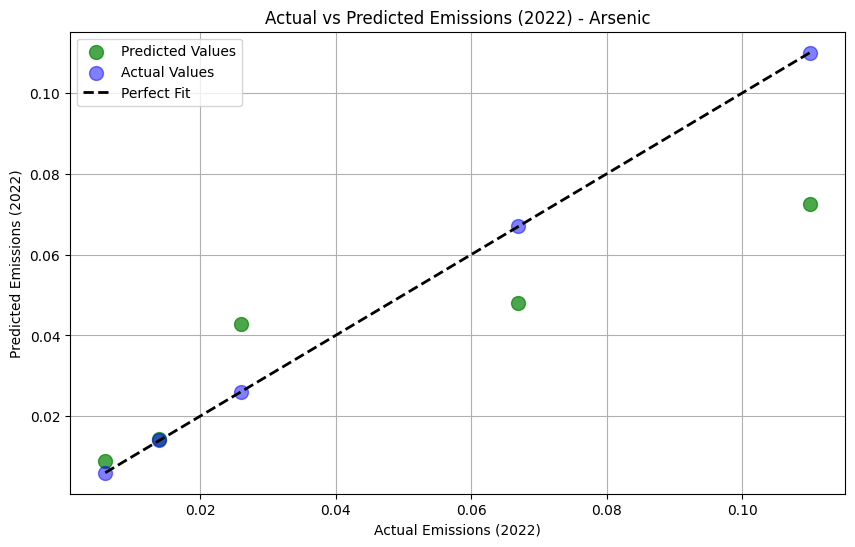

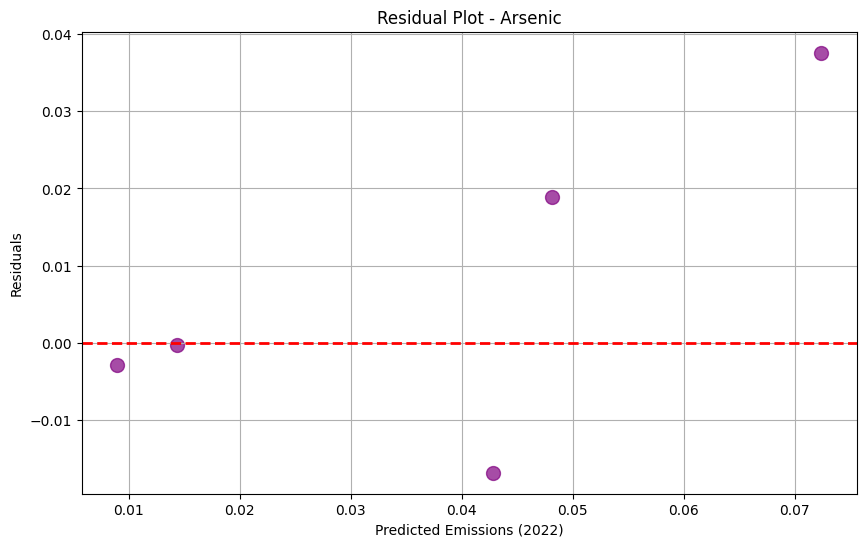

Processing sheet: Cadmium


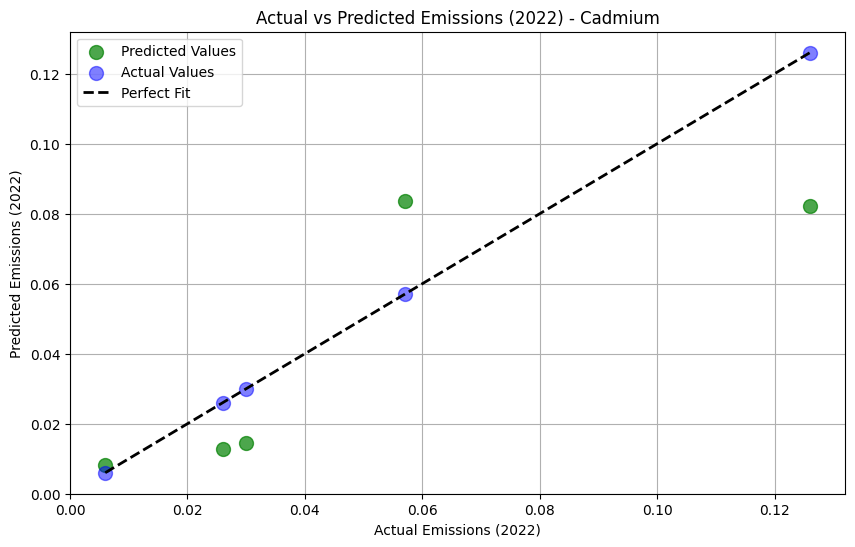

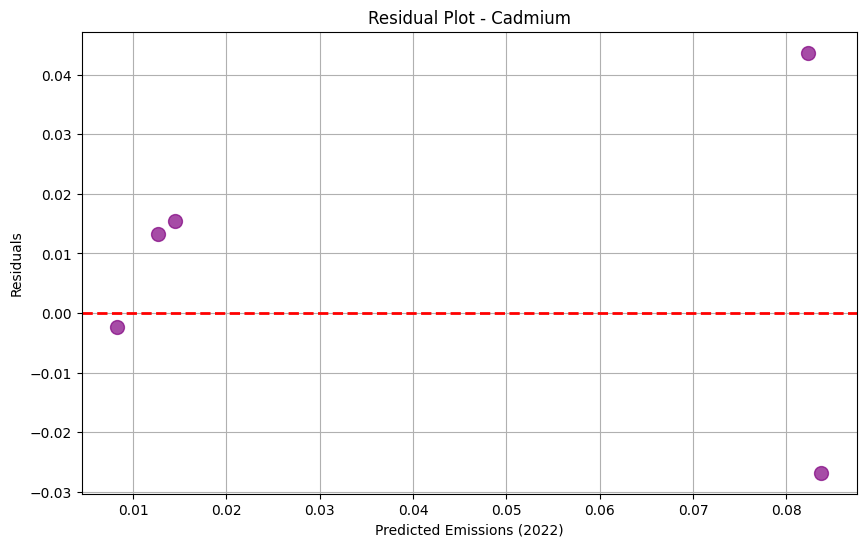

Processing sheet: Chromium


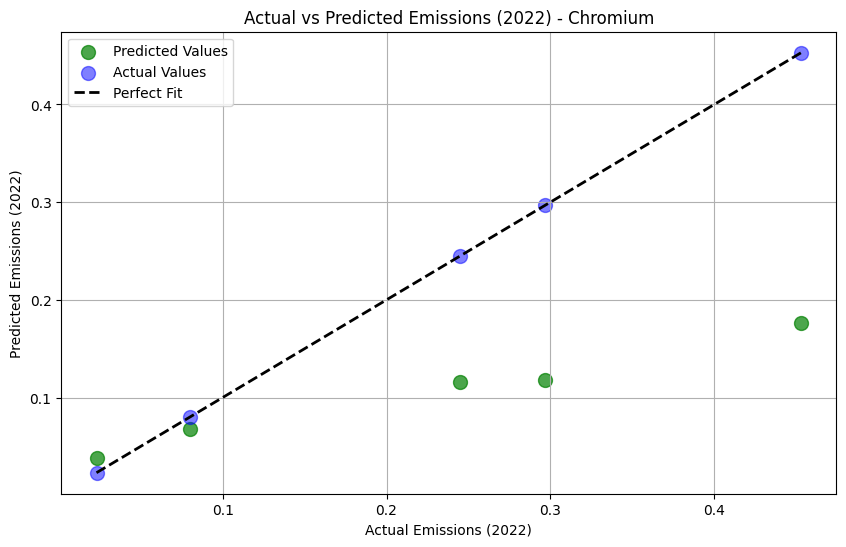

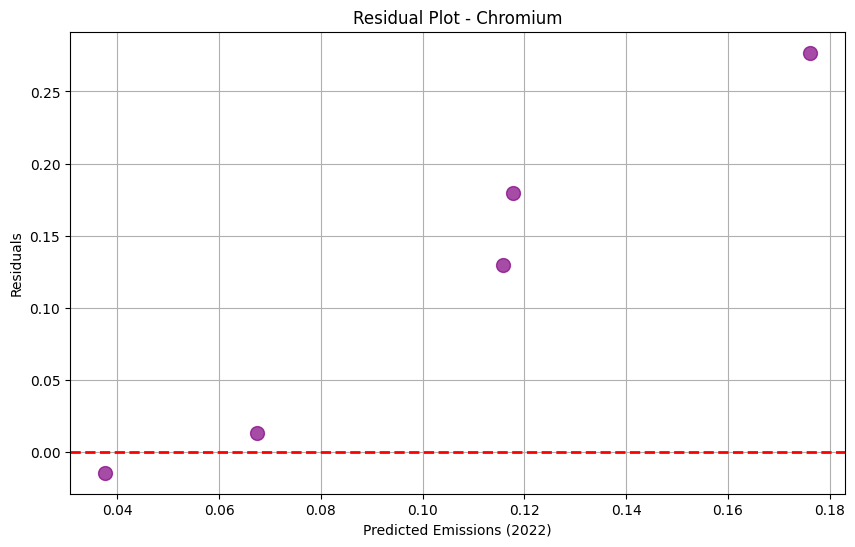

Processing sheet: Copper


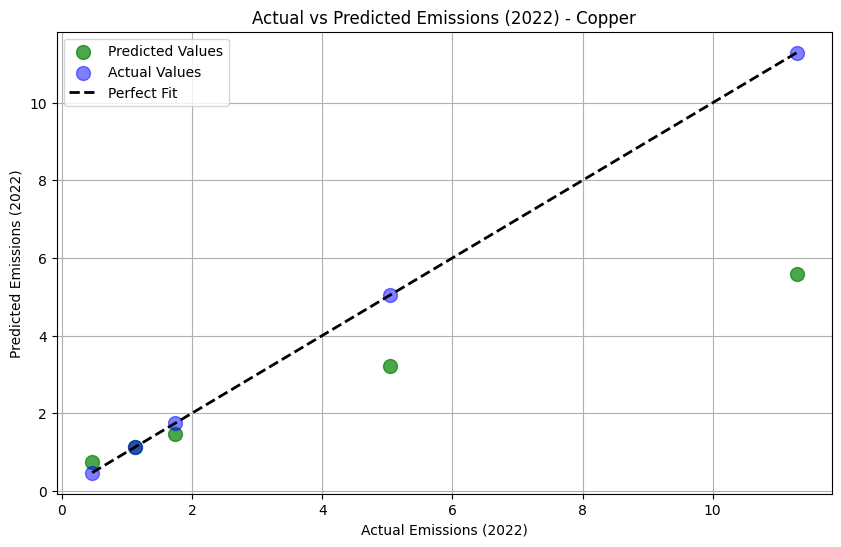

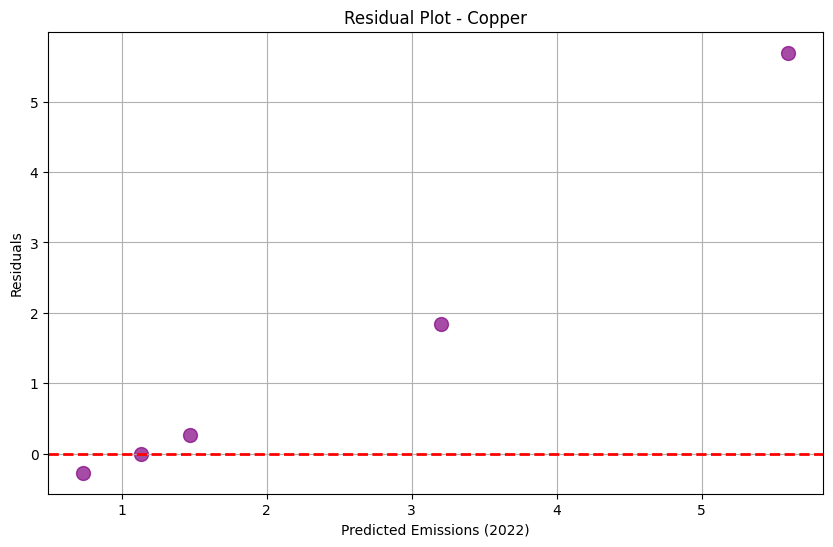

Processing sheet: Lead


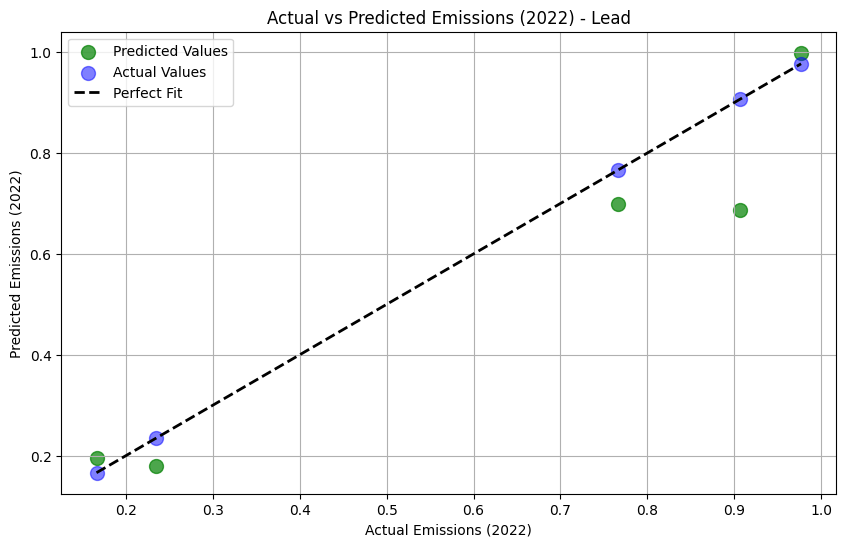

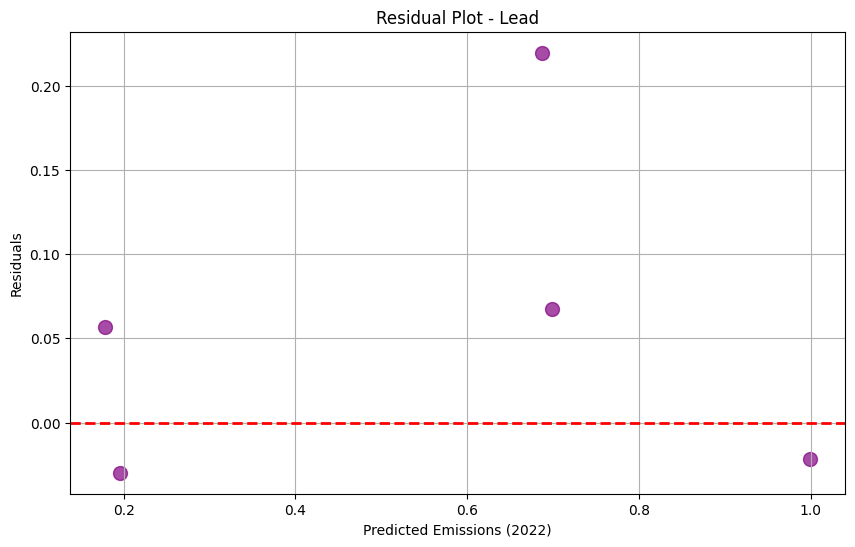

Processing sheet: Mercury


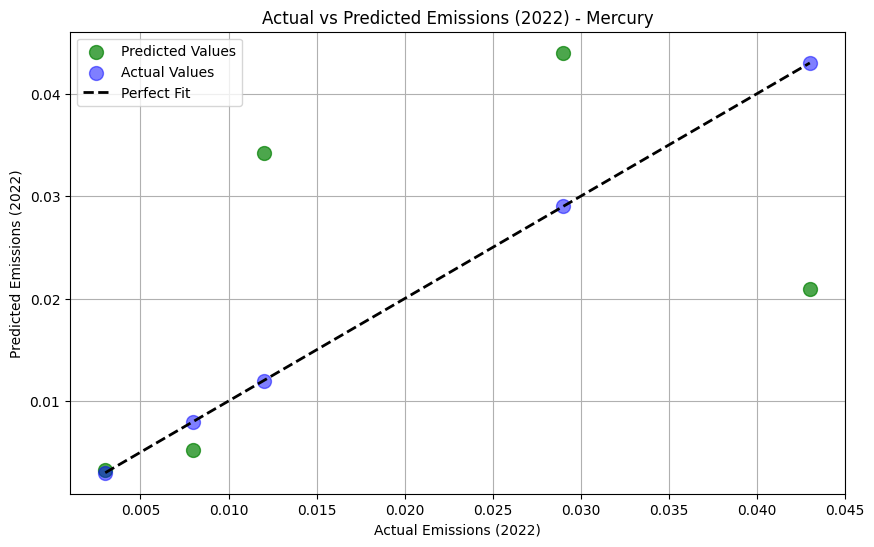

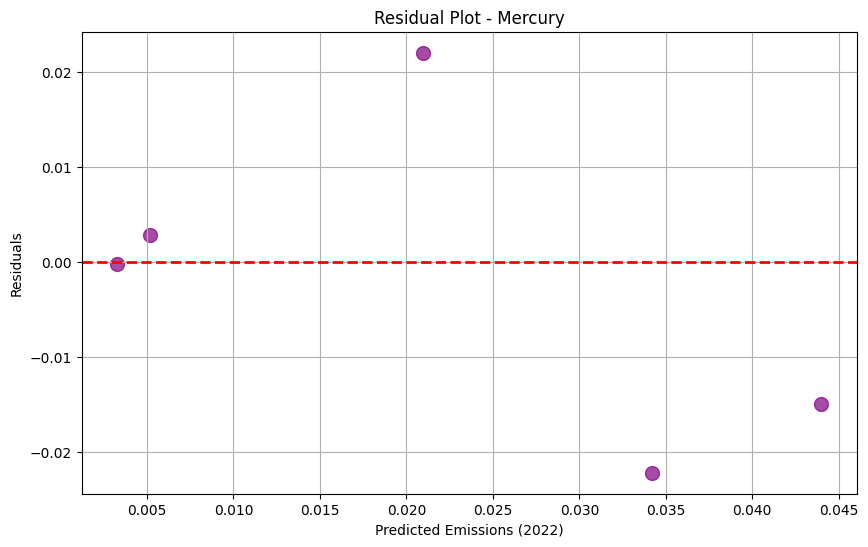

Processing sheet: Nickel


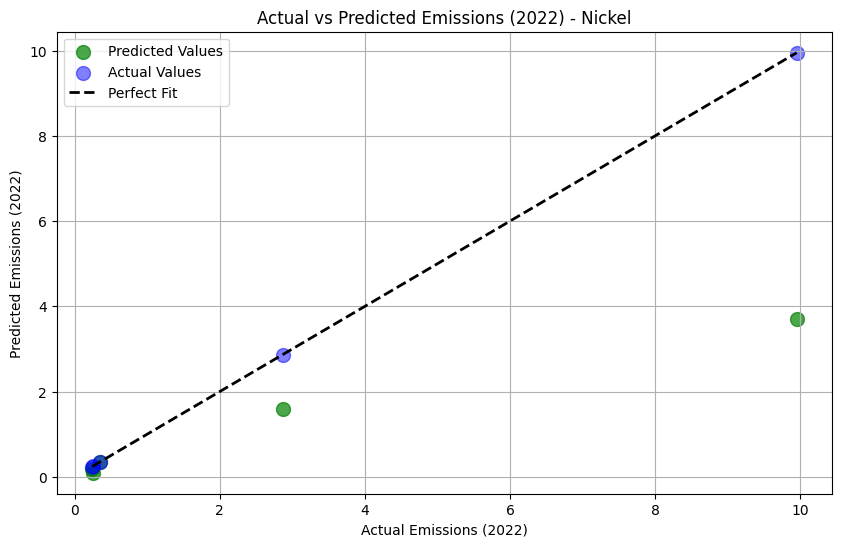

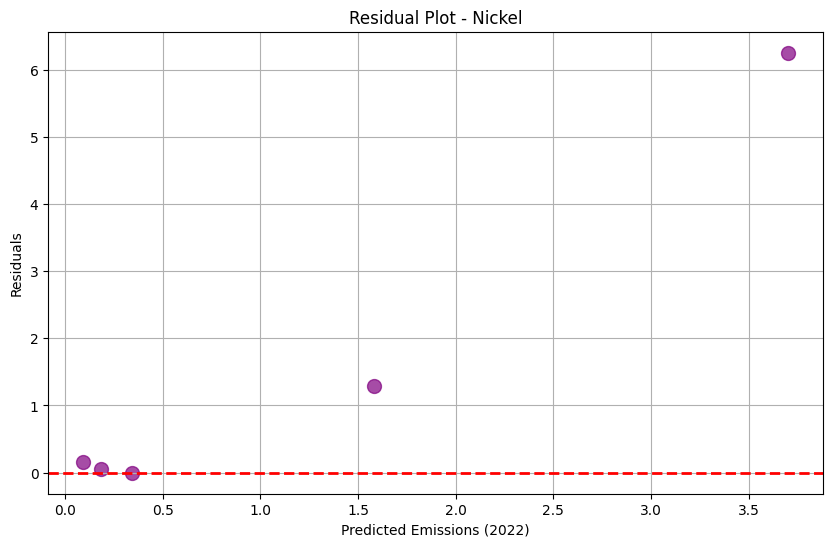

Processing sheet: Selenium


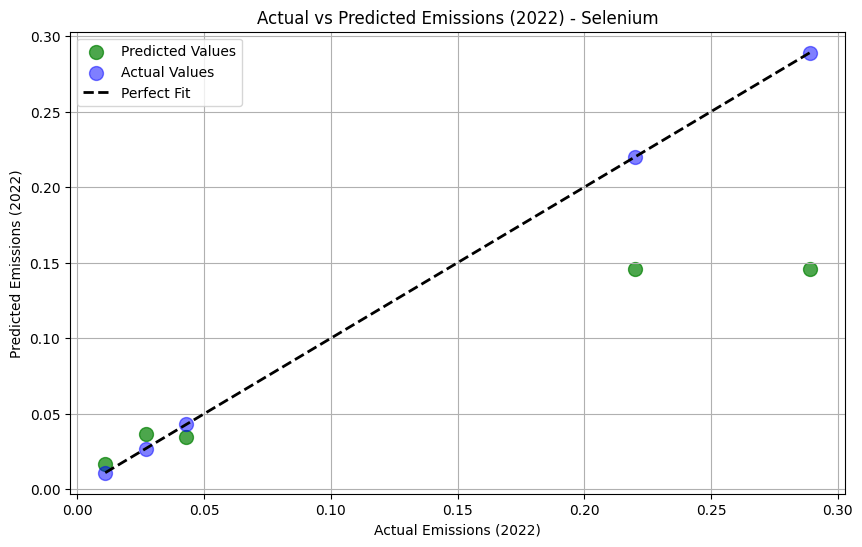

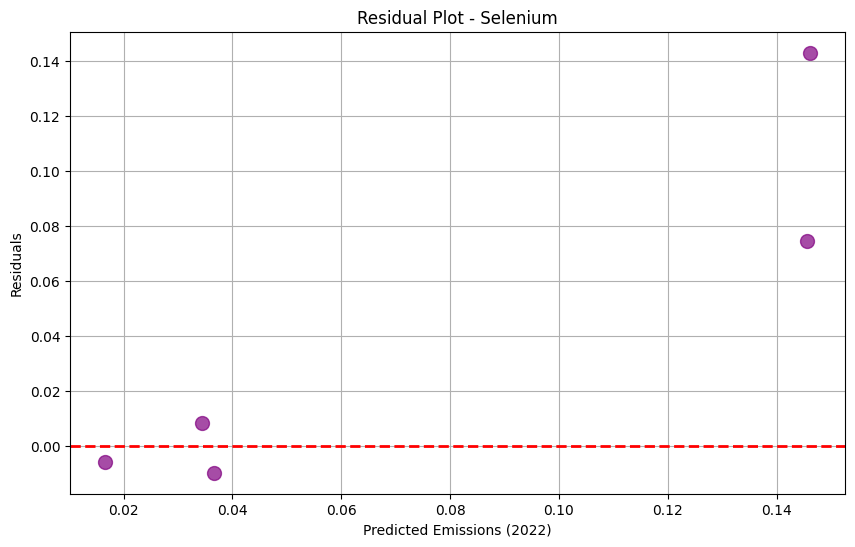

Processing sheet: Vanadium


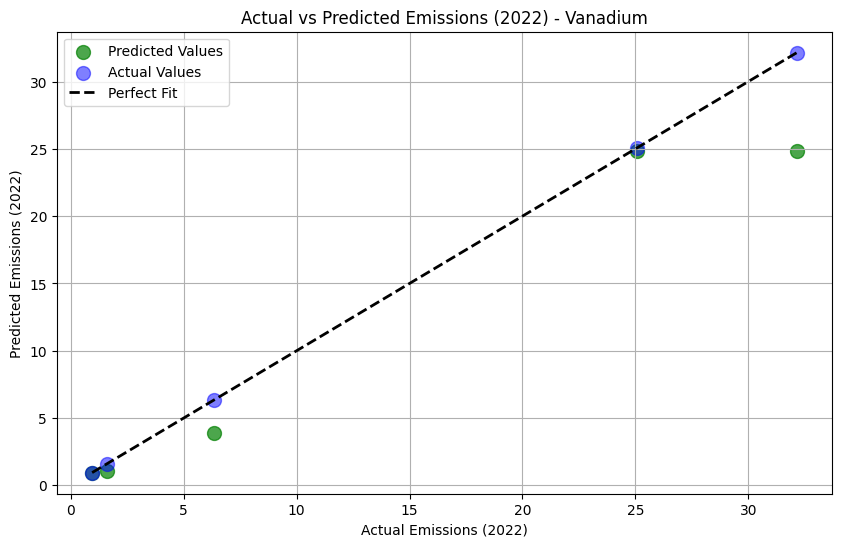

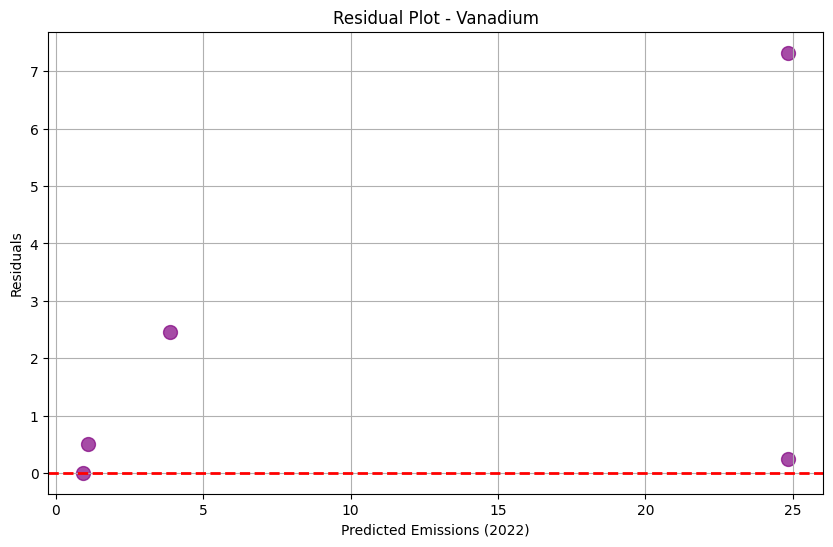

Processing sheet: Zinc


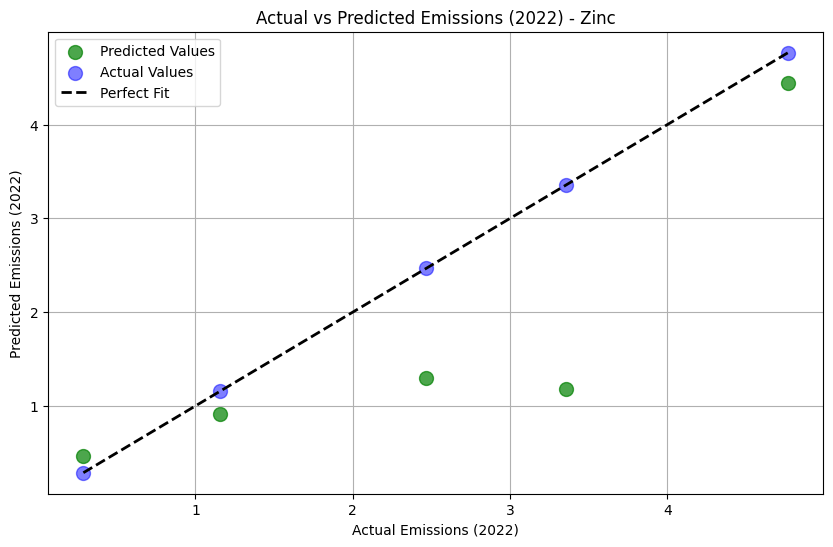

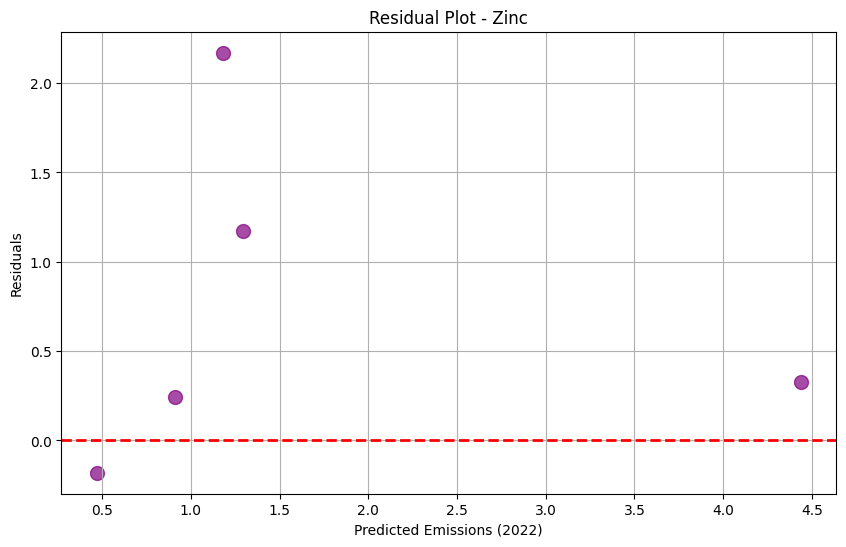

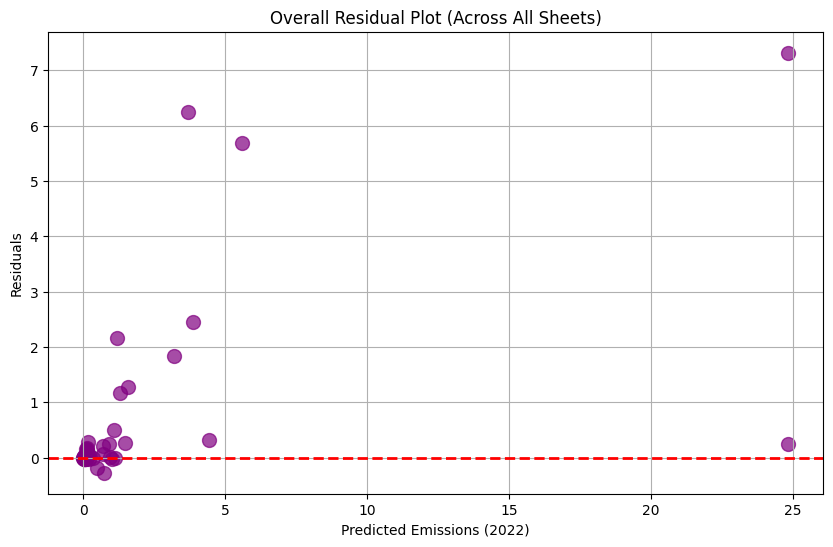

ValueError: x and y must have same first dimension, but have shapes (40,) and (8,)

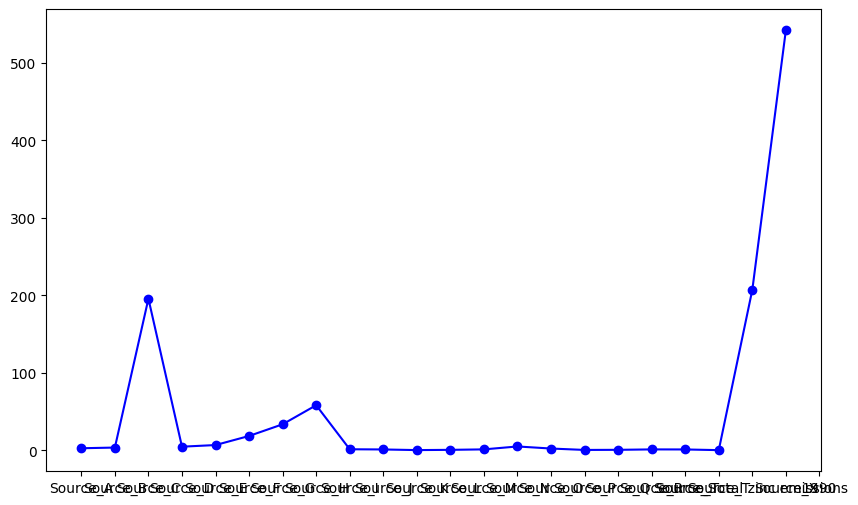

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'AirborneEmissions_Processed.xlsx'

# Get the names of all sheets in the Excel file
sheet_names = pd.ExcelFile(file_path).sheet_names

# Define future years for predictions
future_years = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']

# Initialize lists to hold all predictions and actual values
all_y_true = []
all_y_pred = []

# Iterate through each sheet in the Excel file
for sheet_name in sheet_names:
    print(f"Processing sheet: {sheet_name}")

    # Read the data from the current sheet
    data = pd.read_excel(file_path, sheet_name=sheet_name)

    # Extract the 'Sources' column (categorical variable)
    sources = data['Sources']

    # One-hot encode the 'Sources' column
    encoder = OneHotEncoder(sparse_output=False)
    sources_encoded = encoder.fit_transform(sources.values.reshape(-1, 1))

    # Convert encoded sources to DataFrame and concatenate with the original data
    sources_encoded_df = pd.DataFrame(sources_encoded, columns=encoder.get_feature_names_out(['Source']))
    data_encoded = pd.concat([sources_encoded_df, data.drop(columns=['Sources'])], axis=1)

    # Check for missing values
    if data_encoded.isnull().any().any():
        print("Missing values found. Skipping this sheet.")
        continue  # Skip this sheet if there are missing values

    # Convert all column names to strings to ensure compatibility with scikit-learn
    data_encoded.columns = data_encoded.columns.astype(str)

    # Define features (X) as all years from 1990 to 2021 (excluding the target year 2022)
    X = data_encoded.drop(columns=['2022'])  # We keep all the past years as features except for 2022

    # Define the target variable (y) as the emission values for the year 2022
    y = data_encoded['2022']

    # Split the data into training and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest Regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
    model.fit(X_train, y_train)

    # Predict the emissions for the test set
    y_pred = model.predict(X_test)

    # Store the predictions and actual values
    all_y_true.extend(y_test.tolist())
    all_y_pred.extend(y_pred.tolist())

    ### Actual vs Predicted plot (Updated with custom colors)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='green', label='Predicted Values', s=100, alpha=0.7)  # Green for predicted
    plt.scatter(y_test, y_test, color='blue', label='Actual Values', s=100, alpha=0.5)  # Blue for actual
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
    plt.xlabel('Actual Emissions (2022)')
    plt.ylabel('Predicted Emissions (2022)')
    plt.title(f'Actual vs Predicted Emissions (2022) - {sheet_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    ### Residual Plot
    residuals = y_test - y_pred  # Calculate residuals

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, color='purple', s=100, alpha=0.7)  # Purple for residuals
    plt.axhline(y=0, color='red', linestyle='--', lw=2)  # Horizontal line at residual=0
    plt.xlabel('Predicted Emissions (2022)')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {sheet_name}')
    plt.grid(True)
    plt.show()

# Overall Residuals (Combined across all sheets)
if all_y_true and all_y_pred:
    overall_residuals = np.array(all_y_true) - np.array(all_y_pred)

    plt.figure(figsize=(10, 6))
    plt.scatter(all_y_pred, overall_residuals, color='purple', s=100, alpha=0.7)  # Purple for residuals
    plt.axhline(y=0, color='red', linestyle='--', lw=2)  # Horizontal line at residual=0
    plt.xlabel('Predicted Emissions (2022)')
    plt.ylabel('Residuals')
    plt.title('Overall Residual Plot (Across All Sheets)')
    plt.grid(True)
    plt.show()

# Future Predictions (for last processed sheet)
if all_y_true and all_y_pred:
    future_predictions = pd.DataFrame(columns=future_years)

    # Predict future emissions using the last model trained on the last sheet's data
    for year in future_years:
        future_predictions[year] = model.predict(X)  # Use the same feature set to predict future emissions

    # Visualize future predictions
    years = list(X.columns) + future_years
    past_emissions = y.tolist()  # Actual emissions up to 2022
    predicted_future_emissions = future_predictions.iloc[0].tolist()  # Future predictions for first sample

    plt.figure(figsize=(10, 6))
    plt.plot(years[:len(past_emissions)], past_emissions, 'o-', label="Actual Emissions (1990-2022)", color='blue')
    plt.plot(years[len(past_emissions):], predicted_future_emissions, 'o--', label="Predicted Future Emissions (2023-2030)", color='red')
    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.title("Actual vs Predicted Future Emissions")
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate overall metrics across all sheets
if all_y_true and all_y_pred:
    mse = mean_squared_error(all_y_true, all_y_pred)
    mae = mean_absolute_error(all_y_true, all_y_pred)
    rmse = np.sqrt(mse)

    print("Overall Model Performance Metrics across all sheets using Random Forest:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

    # Optionally, save the overall predictions to a CSV file
    future_predictions.to_csv('future_emissions_predictions_all_sheets_random_forest.csv', index=False)

else:
    print("No valid predictions were made across the sheets.")

print("Processing complete for all sheets.")

# Monte Carlo

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# File and path setup
file_path = 'AirborneEmissions_Processed.xlsx' 
excel_file = pd.ExcelFile(file_path)

num_simulations = 1000
future_years = np.arange(2023, 2031)  
output_file_path = 'predictions_mc.xlsx'  
images_output_dir = 'simulation_images' 

os.makedirs(images_output_dir, exist_ok=True)

# To hold all simulation results across sheets
all_simulation_results = {}

# Loop through each sheet in the Excel file
for sheet_name in excel_file.sheet_names:
    sheet_df = pd.read_excel(file_path, sheet_name=sheet_name)
    print(f"Processing sheet: {sheet_name}, Number of Columns: {sheet_df.shape[1]}")
    
    # Define years and elements from the sheet
    years = sheet_df.columns[1:]
    elements = sheet_df.iloc[:, 0]  
    yearly_change = sheet_df[years].pct_change(axis=1)
    
    # DataFrame to hold simulation results for each element
    simulation_results = pd.DataFrame()

    # Simulate emissions for each element
    for element in elements:
        historical_emissions = sheet_df.loc[sheet_df.iloc[:, 0] == element, years].values.flatten()
        historical_changes = yearly_change.loc[sheet_df.iloc[:, 0] == element].dropna(axis=1).values.flatten()
        
        mean_change = np.mean(historical_changes)
        std_change = np.std(historical_changes)
        
        # Array to store all simulations (past + future)
        all_simulations = np.zeros((num_simulations, len(years) + len(future_years)))
        
        # Monte Carlo simulation loop
        for sim in range(num_simulations):
            simulated_emissions = [historical_emissions[-1]]  # Start with the last known emission value
            
            for _ in future_years:
                random_change = np.random.normal(mean_change, std_change)
                new_value = simulated_emissions[-1] * (1 + random_change)
                simulated_emissions.append(new_value)
            
            total_emissions = np.concatenate([historical_emissions, simulated_emissions[1:]])
            all_simulations[sim, :] = total_emissions
        
        # Mean emission values across all simulations
        mean_emissions = np.mean(all_simulations, axis=0)
        simulation_results[element] = mean_emissions
    
    all_years = np.concatenate([years, future_years])
    simulation_results.index = all_years
    all_simulation_results[sheet_name] = simulation_results
    
    # Custom colors and improved graph plot
    plt.figure(figsize=(10, 6))
    for i, element in enumerate(elements):
        plt.plot(all_years, simulation_results[element], label=element, color=plt.cm.viridis(i / len(elements)))

    plt.xlabel("Year")
    plt.ylabel("Emissions")
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f"Monte Carlo Simulation of Future Emissions ({sheet_name})")
    
    # Save the graph as an image
    image_file_path = os.path.join(images_output_dir, f"{sheet_name}_simulation.png")
    plt.tight_layout()
    plt.savefig(image_file_path)
    plt.close() 
    print(f"Graph saved for sheet '{sheet_name}' at {image_file_path}")

    ### Residual Plot
    # Residuals based on comparison between last known historical value and simulated 2022 value
    last_historical_value = historical_emissions[-1]
    simulated_2022_values = simulation_results.loc[2022].values
    residuals = simulated_2022_values - last_historical_value

    plt.figure(figsize=(10, 6))
    plt.bar(elements, residuals, color='purple')
    plt.axhline(0, color='red', linestyle='--', lw=2)
    plt.xlabel('Elements')
    plt.ylabel('Residuals (Simulated - Actual)')
    plt.title(f'Residual Plot for {sheet_name}')
    plt.grid(True)
    
    residual_image_path = os.path.join(images_output_dir, f"{sheet_name}_residuals.png")
    plt.tight_layout()
    plt.savefig(residual_image_path)
    plt.close()
    print(f"Residual plot saved for sheet '{sheet_name}' at {residual_image_path}")

# Save the simulation results for all sheets into an Excel file
with pd.ExcelWriter(output_file_path) as writer:
    for sheet_name, simulation_result in all_simulation_results.items():
        simulation_result.to_excel(writer, sheet_name=sheet_name)

print(f"Monte Carlo simulation results saved to {output_file_path}")

Processing sheet: Arsenic, Number of Columns: 34
Graph saved for sheet 'Arsenic' at simulation_images\Arsenic_simulation.png
Residual plot saved for sheet 'Arsenic' at simulation_images\Arsenic_residuals.png
Processing sheet: Cadmium, Number of Columns: 34


c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rco

Graph saved for sheet 'Cadmium' at simulation_images\Cadmium_simulation.png
Residual plot saved for sheet 'Cadmium' at simulation_images\Cadmium_residuals.png
Processing sheet: Chromium, Number of Columns: 34
Graph saved for sheet 'Chromium' at simulation_images\Chromium_simulation.png
Residual plot saved for sheet 'Chromium' at simulation_images\Chromium_residuals.png
Processing sheet: Copper, Number of Columns: 34
Graph saved for sheet 'Copper' at simulation_images\Copper_simulation.png
Residual plot saved for sheet 'Copper' at simulation_images\Copper_residuals.png
Processing sheet: Lead, Number of Columns: 34
Graph saved for sheet 'Lead' at simulation_images\Lead_simulation.png
Residual plot saved for sheet 'Lead' at simulation_images\Lead_residuals.png
Processing sheet: Mercury, Number of Columns: 34


c:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Graph saved for sheet 'Mercury' at simulation_images\Mercury_simulation.png
Residual plot saved for sheet 'Mercury' at simulation_images\Mercury_residuals.png
Processing sheet: Nickel, Number of Columns: 34
Graph saved for sheet 'Nickel' at simulation_images\Nickel_simulation.png
Residual plot saved for sheet 'Nickel' at simulation_images\Nickel_residuals.png
Processing sheet: Selenium, Number of Columns: 34
Graph saved for sheet 'Selenium' at simulation_images\Selenium_simulation.png
Residual plot saved for sheet 'Selenium' at simulation_images\Selenium_residuals.png
Processing sheet: Vanadium, Number of Columns: 34
Graph saved for sheet 'Vanadium' at simulation_images\Vanadium_simulation.png
Residual plot saved for sheet 'Vanadium' at simulation_images\Vanadium_residuals.png
Processing sheet: Zinc, Number of Columns: 34
Graph saved for sheet 'Zinc' at simulation_images\Zinc_simulation.png
Residual plot saved for sheet 'Zinc' at simulation_images\Zinc_residuals.png
Monte Carlo simulat